# Machine Learning Model for Telco Customer Churn

## Background and Problem
Customer churn becomes one of the most important metrics to understand in a business. It tells us about how retain our customers towards our product/services. The higher the churn rate is, the more likely our customer to not use our product/service anymore, and this is concerning, since impacting to our revenue in a business.

Therefore, in this dataset, we're going to learn what's the factor of customer churn from Telco Customer Churn dataset.

The dataset is represented as follows

- Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
- Customers who left within the last month – the column is called Churn
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Here, we're going to utilize machine learning classification model to predict whether the customer churn or not using Decision Tree, Random Forest, and XGBoost, and perform analytical metrics towards those model to see which one is better.

## Outlines

What we're going to cover in this notebook

1. Data Profiling and Cleaning
2. Data Transformation
3. Data Preparation
4. Baseline Model
5. Imbalanced Handling SMOTE
6. Decision Tree Visualizations : Educational Purposes
7. Hyperparameters Tuning
8. Conclusion

## Data Profiling and Cleaning

In this stage, we are going to get familiarity with the dataset in general by exploring certain things

- General info of the size and missing/null values of the dataset
- Description of the data
- Missing value handling
- Univariate analysis
- Bivariate analysis
- Multivariate analysis

In [ ]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import time
import re

In [ ]:
# load data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hyperparameter Tuning In Python/Tugas/churn.csv')

In [ ]:
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,NaN,No,1.0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Observations:
1. All columns, except the `tenure`, `MonthlyCharges`, and `TotalCharges`, contain categorical or binary data.
2. The `PaperlessBilling`, `Partner`, `Dependents`, and `Churn` columns appear to be categorical with values like Yes or No.
3. `SeniorCitizen` is apparently also binary (0,1).
4. No obvious defects are identified in the data, and the column names align with their respective entries.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7037 non-null   object 
 1   Gender            7030 non-null   object 
 2   SeniorCitizen     7034 non-null   float64
 3   Partner           7030 non-null   object 
 4   Dependents        7027 non-null   object 
 5   Tenure            7029 non-null   float64
 6   Contract          7033 non-null   object 
 7   PaperlessBilling  7033 non-null   object 
 8   PaymentMethod     7035 non-null   object 
 9   MonthlyCharges    7036 non-null   float64
 10  TotalCharges      7046 non-null   float64
 11  Churn             7046 non-null   object 
dtypes: float64(4), object(8)
memory usage: 660.7+ KB


Observations:
1. The dataset comprises **12 columns** and a total of **7046 rows**.
2. The dataset has **missing values**.
3. All data types (dtypes) seem **appropriate**, given the corresponding column name.

### Missing Value and Duplicated Handling

Let's check missing (null or empty string) value

In [ ]:
def missing_value(df):

    missing = []
    for columns in df.columns:
        missing_shape = df[df[columns].isna()].shape
        percentage = round(missing_shape[0]/df.shape[0] * 100, 3)

        if df[columns].dtypes != 'object':
            max, min = df[columns].max(), df[columns].min()
        else:
            max, min = '-', '-'

        missing.append({'Columns' : columns.upper(),
                        'N/A count' : missing_shape[0],
                        'Percentage' : str(percentage) + '%',
                        'Max' : max,
                        'Min' : min}
                        )
    return pd.DataFrame(missing)

missing = missing_value(df).sort_values(by='Percentage', ascending=False)
missing

,Columns,N/A count,Percentage,Max,Min
4,DEPENDENTS,19,0.27%,-,-
5,TENURE,17,0.241%,72.0,1.0
1,GENDER,16,0.227%,-,-
3,PARTNER,16,0.227%,-,-
6,CONTRACT,13,0.185%,-,-
7,PAPERLESSBILLING,13,0.185%,-,-
2,SENIORCITIZEN,12,0.17%,1.0,0.0
8,PAYMENTMETHOD,11,0.156%,-,-
9,MONTHLYCHARGES,10,0.142%,118.75,18.25
0,CUSTOMERID,9,0.128%,-,-


In [ ]:
# Total missing value
missing_percentage = missing['N/A count'].sum() / df.shape[0] * 100
print('Missing Value Percentage = {:.2f}%'.format(missing_percentage))

Missing Value Percentage = 1.93%


In [ ]:
# Check duplicated value
duplicated_percentage = df.duplicated().sum() / df.shape[0] * 100

# Print total duplicated value and its percentage
print('Total Duplicate Data = {}'.format(df.duplicated().sum()))
print('Duplicated Percentage = {:.2f}%'.format(duplicated_percentage))

Total Duplicate Data = 14
Duplicated Percentage = 0.20%


In [ ]:
# Drop missing value and duplicated value
df.dropna(inplace=True)

df.drop_duplicates(inplace=True)

In [ ]:
for col in df.columns:
    if df[col].dtypes == object:
        print('{} : {}'.format(col, df[col].unique()))

customerID : ['5575-GNVDE' '3668-QPYBK' '7795-CFOCW' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Gender : ['Male' 'Female']
Partner : ['No' 'Yes']
Dependents : ['No' 'Yes']
Contract : ['One year' 'Month-to-month' 'Two year']
PaperlessBilling : ['No' 'Yes']
PaymentMethod : ['Mailed check' 'Bank transfer (automatic)' 'Electronic check'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
categorical = []
numeric = []
for col in df.columns:
    if df[col].dtypes == 'object':
        categorical.append(col)
    else:
        numeric.append(col)

In [ ]:
# numerical statistical summary
df[numeric].describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,6898.000000,6898.000000,6898.000000,6898.000000
mean,0.161931,32.433749,64.839439,2286.277320
std,0.368414,24.528786,30.100388,2265.938904
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.550000,401.150000
50%,0.000000,29.000000,70.400000,1400.700000
75%,0.000000,55.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


Observations:
* Minimum and maximum values in each column make sense, indicating no outliers or unrealistic data points.
* `SeniorCitizen` is a binary column (0 or 1), representing whether a customer is a senior citizen.
* `Tenure` represents the months a customer has been with the service, with a mean of around 32 months. Customer tenure ranges from 1 month up to a maximum of 72 months (6 years).
* `MonthlyCharges` has a mean of around 64.84, ranging from 18.25 to 118.75. About 75% of customers pay less than $89.90 per month.

* `TotalCharges` has a mean of approximately 2286.28, ranging from 18.80 to 8684.80. About 75% of customers have total charges less than $3807.84.

In [ ]:
# categorical summary
for category in categorical:
    print(df[category].value_counts())
    print()

customerID
5575-GNVDE    1
7550-WIQVA    1
7816-VGHTO    1
4007-NHVHI    1
5181-OABFK    1
             ..
9548-ZMVTX    1
2683-JXWQQ    1
7089-RKVSZ    1
0020-INWCK    1
3186-AJIEK    1
Name: count, Length: 6898, dtype: int64

Gender
Male      3488
Female    3410
Name: count, dtype: int64

Partner
No     3573
Yes    3325
Name: count, dtype: int64

Dependents
No     4845
Yes    2053
Name: count, dtype: int64

Contract
Month-to-month    3803
Two year          1653
One year          1442
Name: count, dtype: int64

PaperlessBilling
Yes    4088
No     2810
Name: count, dtype: int64

PaymentMethod
Electronic check             2309
Mailed check                 1581
Bank transfer (automatic)    1514
Credit card (automatic)      1494
Name: count, dtype: int64

Churn
No     5073
Yes    1825
Name: count, dtype: int64



Observations:
* `Gender` distribution is balanced: 3488 males and 3410 females.
* `Partner` status shows a slight imbalance: 3573 without a partner, 3325 with a partner.
* Majority have no dependents (4845), while 2053 have dependents.
* `Contract` distribution: Month-to-month (3803), two-year (1653), one-year (1442).
* 4088 individuals have `PaperlessBilling`, 2810 do not.
* `PaymentMethod` distribution is relatively balanced: Electronic check (2309), mailed check (1581), bank transfer (automatic) (1514), credit card (automatic) (1494).
* `Churn` status imbalance: 5073 not churning, 1825 churning.

In [ ]:
# describe method on categorical data
df[categorical].describe()

,customerID,Gender,Partner,Dependents,Contract,PaperlessBilling,PaymentMethod,Churn
count,6898,6898,6898,6898,6898,6898,6898,6898
unique,6898,2,2,2,3,2,4,2
top,5575-GNVDE,Male,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3488,3573,4845,3803,4088,2309,5073


Observations:
* `Gender` has two values: 'Male' and 'Female', with 'Male' being the most common (3488).
* Categories like `Partner`, `Dependants`, `PaperlessBilling`, and `Churn` have 'Yes' and 'No' options. 'No' is the top value for Partner, `Dependants`, and` Churn`, while 'Yes' is the top value for `PaperlessBilling`.
* `Contract` has three options, and the majority opt for a month-to-month contract (3803).
* `PaymentMethod` offers four choices, and 'Electronic check' is the most common with a value of 2309.

### Univariate Analysis

Let's categorize those columns into categorical, ordinal, and numeric columns as represented below.

- categorical : the value stands for binary value, something like **yes** and **no**, or **female** and **male**
- ordinal : variables with an ondered lists
- numeric : variables with discrete or continous numerical value

In [ ]:
# group column names based on type
# it will make our life easier onwards
category_columns = ['Gender', 'Partner', 'Dependents', 'PaperlessBilling', 'Churn']

ordinal_columns = ['PaymentMethod', 'Contract']

numerical_columns = ['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
def categorical_plots(df, category, type):

    num_cols = 3
    length = len(category)
    num_rows = length // 3 + 1 if length % 3 != 0 else length // 3

    if type == 'categorical':
        size_x, size_y = (15, 9)
    elif type == 'ordinal' :
        size_x, size_y = (15,4)

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(size_x,size_y))

    colors = ['#EC7063', '#A569BD','#EC407A', '#2196F3', '#00ACC1', '#FB8C00']

    for index, axes in enumerate(axs.flatten()[:length]):
        df[category[index]].value_counts(normalize=False).plot(kind='bar',
                                                               ax = axes,
                                                               title = category[index].capitalize(),
                                                               color = colors[index]).set_xlabel("")
        axes.set_ylim(0,10000)

        if type == 'categorical':
            axes.tick_params(axis='x', rotation=0)
        elif type == 'ordinal':
            axes.tick_params(axis='x', rotation=45)

        position = df[category[index]].value_counts(normalize=True)
        get_position = df[category[index]].value_counts(normalize=False).to_list()
        data_point = position.apply(lambda x : x*100).astype('str').apply(lambda x : x[:5] +" %").tolist()

        for i in range(len(get_position)):
            axes.text(i, get_position[i] + 200, data_point[i],
                      ha='center', color = 'black', fontsize=10)

    plt.subplots_adjust(wspace=0.2,
                        hspace=0.3)

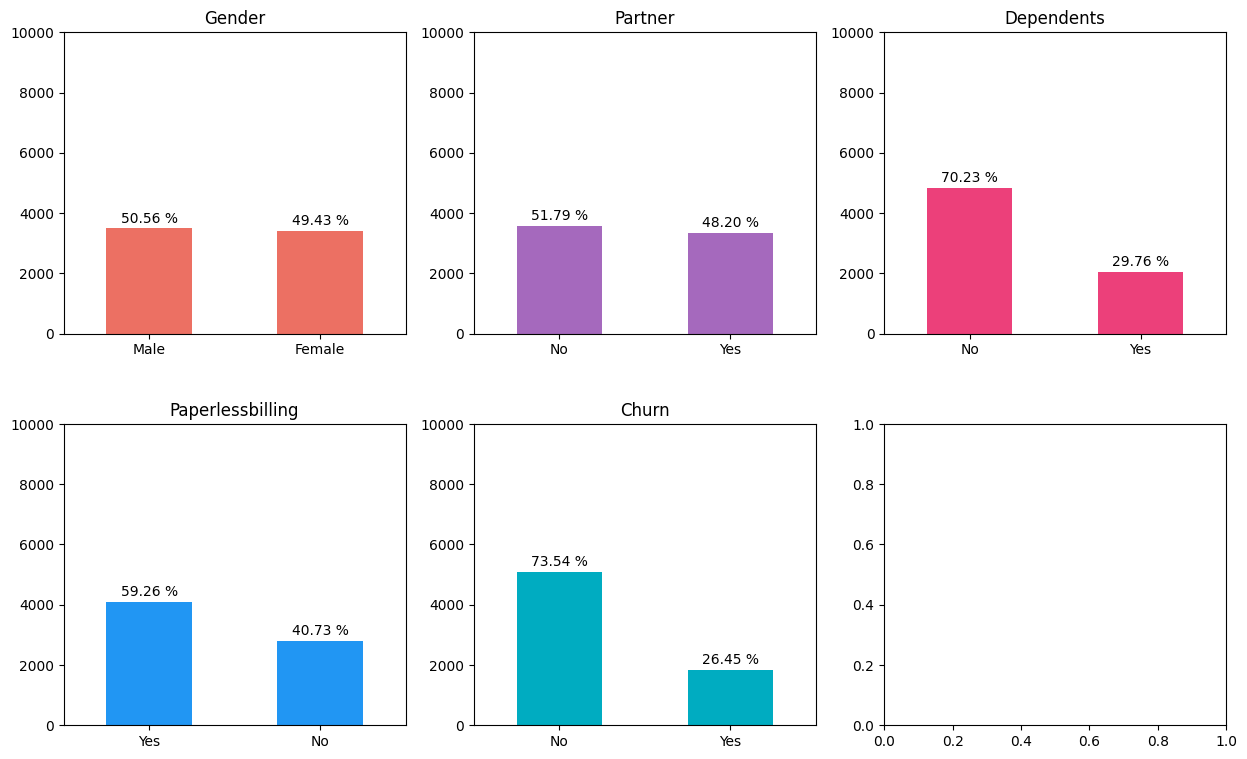

In [ ]:
# take a subset of category columns to plot
categorical_plots(df, category_columns, 'categorical')

Observations:
* The majority of customers, around 73.54%, remained subscribed, while approximately 26.45% of customers decided to stop subscribing, indicating churn.
* The distribution of users, both in terms of gender and partner statuses, is impressively balanced. We have an equitable representation of both male and female users, as well as individuals with and without partners.
* There's a clear difference between customers with and without dependents, where 29.76% have dependents.
* There's a somewhat similar percentage of customers choosing paperless billing and not, most customers show a strong preference for using paperless billing.

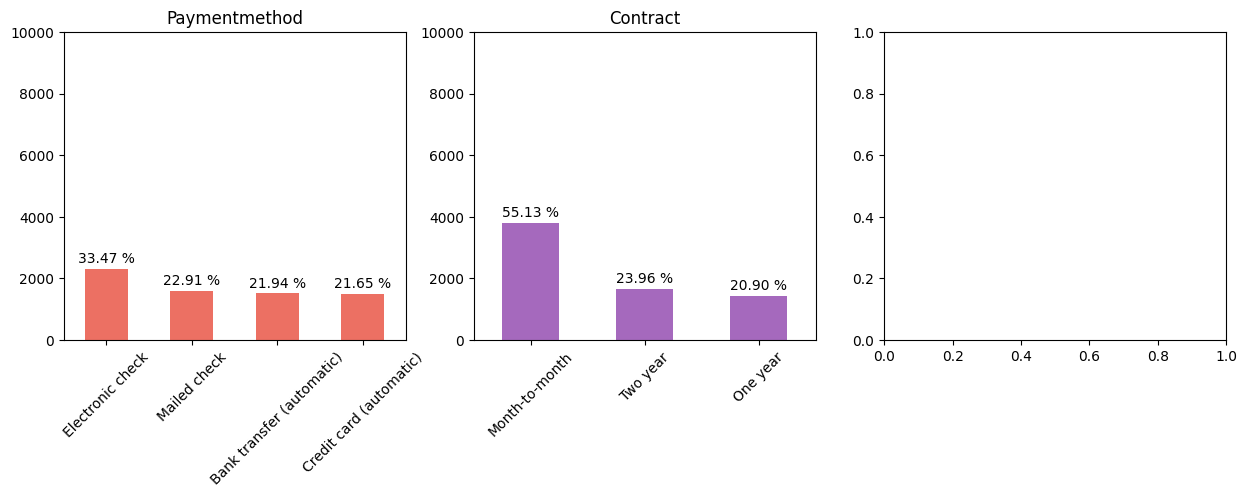

In [ ]:
categorical_plots(df, ordinal_columns, 'ordinal')

Observations:
* A clear difference in the contract graph shows that more than 50% of customers prefer monthly payments instead of annual contracts.
* Electronic checks are the most popular payment method among customers.

In [ ]:
def numeric_plot(df, numeric_cols, type):

    fig_num, axes_num = plt.subplots(1,4, figsize= (18,5))

    colors = ['#FB8C00','#EC407A', '#A569BD','#00ACC1']

    for index, axes in enumerate(axes_num.ravel()):
        if type == 'hist':
            plot = sns.histplot(df[numeric_cols[index]],
                                kde=True, ax=axes, color = colors[index])
        elif type == 'box':
            plot =  sns.boxplot(df[numeric_cols[index]],
                                ax=axes, color = colors[index])
        plot.set(xlabel = '', ylabel='Frequency', title = numeric_cols[index])


    fig_num.tight_layout()

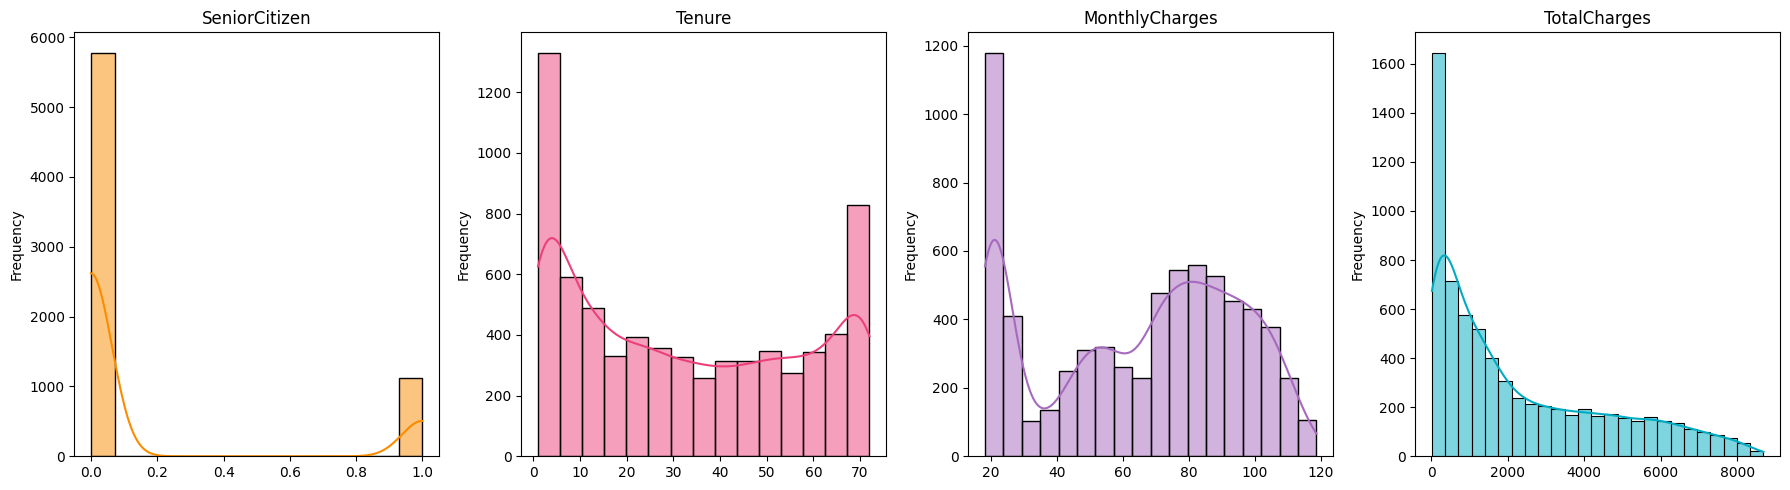

In [ ]:
numeric_cols = df.select_dtypes('float64').columns.tolist()

numeric_plot(df, numeric_cols, 'hist')

Observation:
* The majority of customers are non-SeniorCitizens. The maximum value of 1 for `SeniorCitizen` indicates the presence of SeniorCitizens in the dataset.
*   `Tenure` suggests that a considerable number of customers have shorter tenure durations, as indicated by the peak around the lower values. The distribution is right-skewed, with a tail extending towards higher tenure values.
* `MonthlyCharges` exhibit a peak around the mid-range values, as indicated by the histogram. The distribution is somewhat symmetric.
* The histogram for `TotalCharges` is positively skewed, with a concentration towards lower values. A significant number of customers appear to have lower total charges, as evidenced by the peak around the lower values.

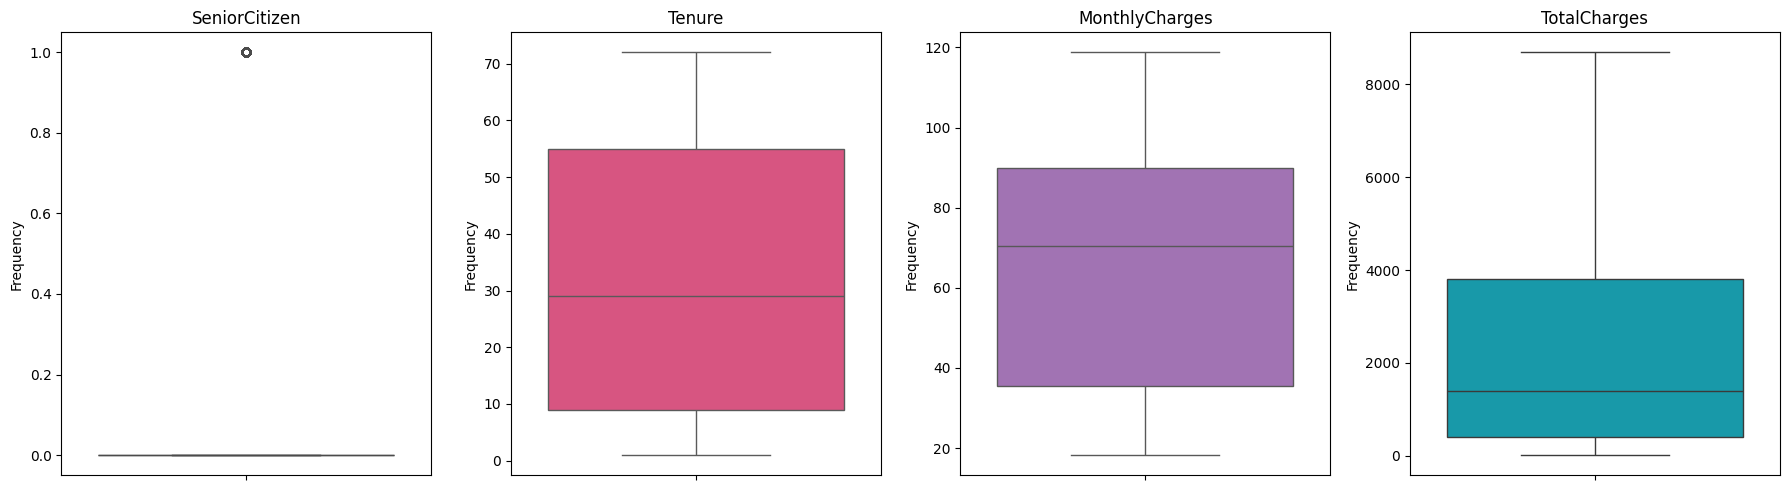

In [ ]:
numeric_plot(df, numeric_cols, 'box')

Observations:
* For `SeniorCitizen` outliers might not be as relevant since it's a binary variable.
* No outliers detected in `Tenure`, `MonthlyCharges`, and `TotalCharges`.
* `Tenure` shows a consistent distribution without extreme values, indicating similar customer tenures.
* `MonthlyCharges` lack outliers, suggesting uniformity in charges without significant deviations.
* `TotalCharges` exhibit no outliers, indicating a uniform distribution without exceptionally high or low charges.

## **Bivariate Analysis**

In [ ]:
def bivariate_bar_plot(df, ordinal_columns, target_variabel, type):

    if type == 'bar':

        fig, axs = plt.subplots(1, 3, figsize=(12,5))

        colors = ["Set2", "flare"]

        for index, axes in enumerate(axs.flatten()):

            plot = sns.countplot(x = ordinal_columns[index], hue = target_variabel, data=df,
                                 ax = axes, palette = colors[index])

            plot.set(xlabel='', ylabel = 'Frequency', title=ordinal_columns[index])

            for index, p in enumerate(axes.patches):
                height = p.get_height()
                x = p.get_x() + (p.get_width()/2)
                if x != 0.0:
                    axes.text(x, y = height + 30, s = '{:.0f}'.format(height), ha = 'center')

    elif type == 'barstacked':

        fig, axs = plt.subplots(1,3, figsize = (18,5))

        colors = [['tomato','lightseagreen'], ['#A569BD','#00ACC1'], ['#00ACC1', '#FB8C00']]

        for index, axes in enumerate(axs.flatten()):
            df_stack = df.groupby([target_variabel, ordinal_columns[index]]).size().reset_index()
            df_stack = df_stack.pivot(columns= target_variabel, index= ordinal_columns[index], values=0)
            df_reverse = df_stack[df_stack.columns[::-1]]

            df_reverse.plot(kind='bar', stacked=True, ax = axes,
                            title = ordinal_columns[index], color = colors[index],
                            ylabel = 'Frequency').set_xlabel("")

            axes.tick_params(axis='x', rotation=45)

            for c in axes.containers:
                label = [int(l.get_height()) for l in c]
                axes.bar_label(c, labels = label, label_type = 'edge')

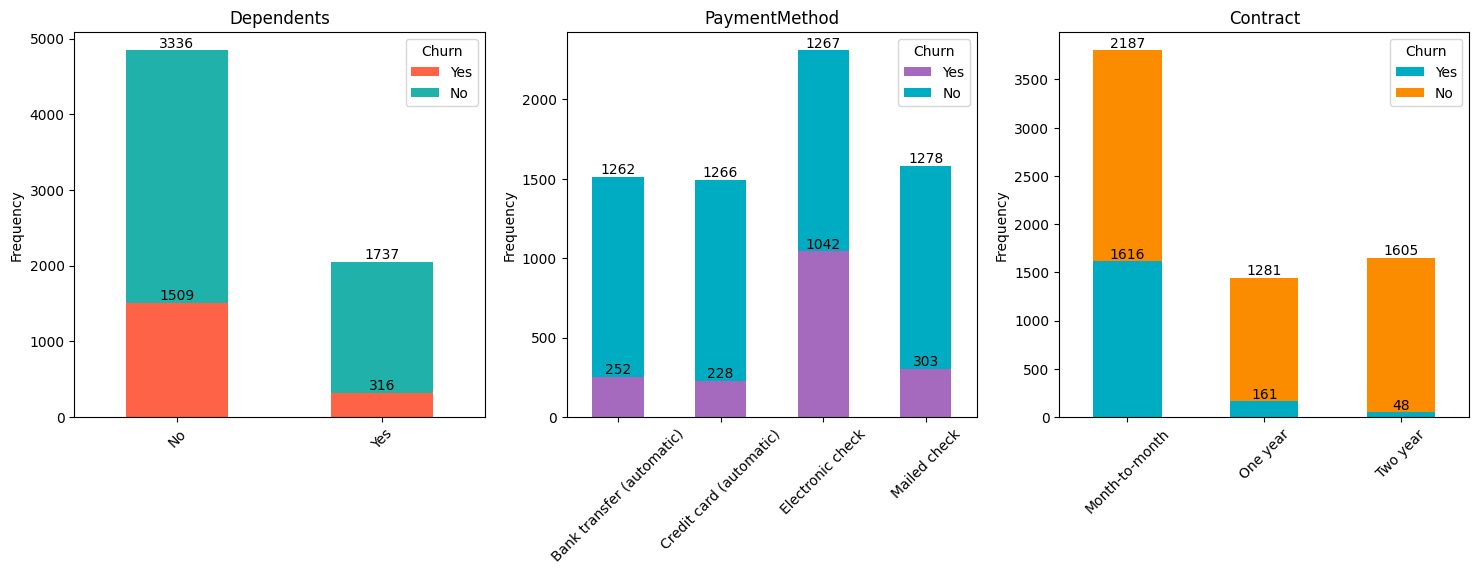

In [ ]:
columns = ['Dependents', 'PaymentMethod', 'Contract']
bivariate_bar_plot(df, columns, 'Churn', 'barstacked')

- The churn rate among monthly contract (month to month) customers is significantly higher compared to customers with long-term (one year and two year) contracts. Customers with long-term (one year and two year) contracts exhibit a lower likelihood of discontinuing the service (churning).
- It appears that customers who opt for electronic check payment methods experience the highest churn rate.
- From this graph, we observe that churn is more prevalent among customers without dependents compared to those with dependents. This suggests that customers with dependents are less inclined to churn compared to those without dependents.

### Multivariate Analysis

In [ ]:
def multivariate_plots(df, numeric, category, target_variable):

    bin = np.linspace(df[numeric].min(), df[numeric].max(), 50)
    graph = sns.FacetGrid(df, col=category, hue = target_variable, palette="Set2",
                          col_wrap=3, height = 7, aspect=1.1)
    graph.map(plt.hist, numeric, bins=bin, ec="k")

    for ax in graph.axes.ravel():
        ax.legend(title= target_variable)

    graph.set(ylabel = 'Frequency', xlabel= numeric)

    #plt.savefig(path + 'multivariate-value.png')

    plt.show()

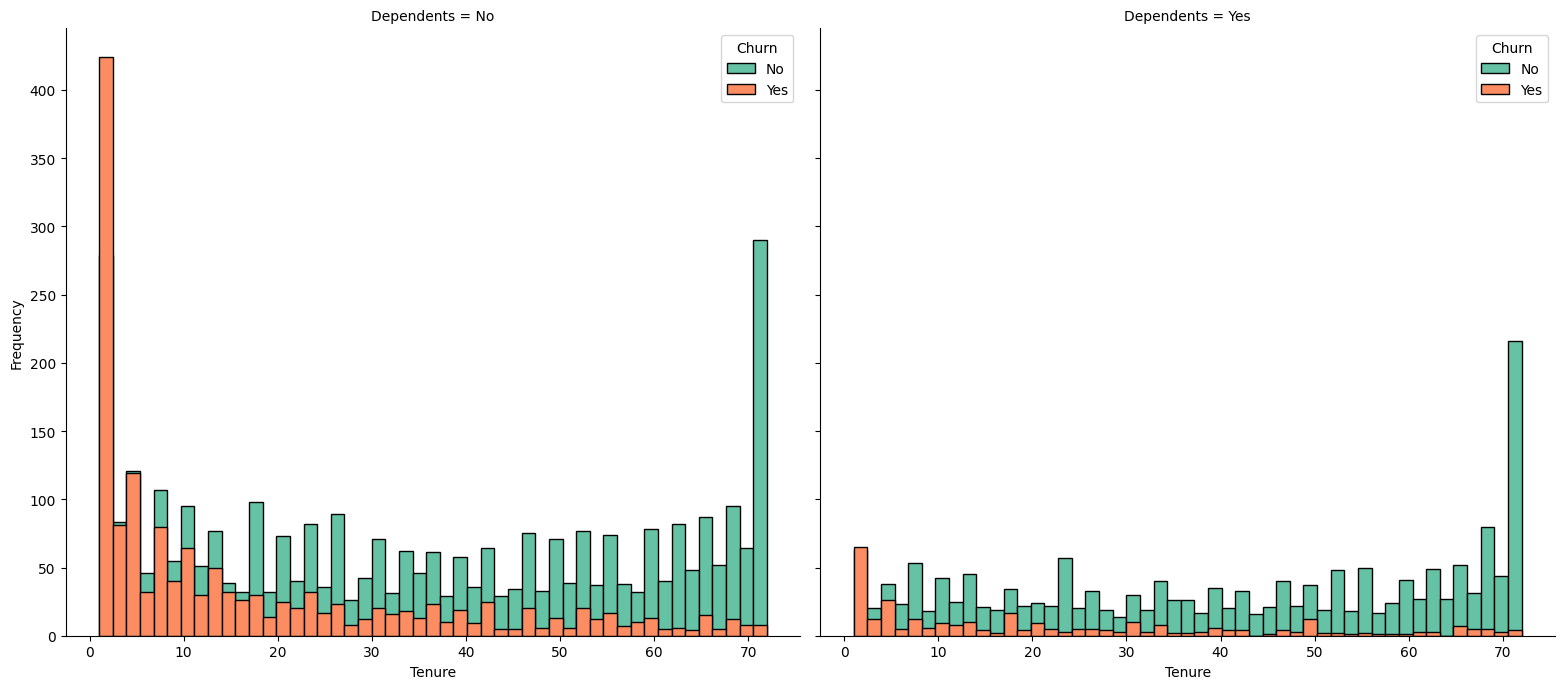

In [ ]:
multivariate_plots(df, 'Tenure', 'Dependents', 'Churn')

The graph indicates that customers who churn in customer who no dependant and have dependant are more likely to be those who have used the service for less than 5 months. The highest frequency of customer churn occurs in the first month of service usage. This suggests that many customers decide to stop using the service within the initial five months, with the majority discontinuing in the very first month. Possible reasons for this trend could include unsatisfactory initial experiences, quick assessments of the service, potential offers from competitors, or early customer dissatisfaction.

## Data Transformation

- Unique value of categorical checking
- Label encoding
- One hot encoding

In [ ]:
# Encode the categorical variable into numeric
def label_encoding(df, ordinal_columns):

    categoricals = df.drop(columns = ordinal_columns, axis=1).columns

    for col in categoricals:
        df[col] = df[col].replace({'Male' : 1.0, 'Female' : 0.0,
                                   'Yes' : 1.0, 'No' : 0.0})

    return df.drop(columns = 'customerID', axis=1)

# Encode ordinal columns, and drop first encoding-columns to avoid multicollinearity
def onehotencoding(df, columns):

    onehot = pd.DataFrame()
    for col in columns:
        encoding = pd.get_dummies(df[col], prefix=col, dtype='float')
        encoding = encoding.drop(encoding.columns[-1], axis=1)
        onehot = pd.concat([onehot, encoding], axis=1)

    return onehot

# Final cleaning to get feature and target data
def feature_cleaning(df, ordinal_columns):
    df_encode = label_encoding(df, ordinal_columns)

    # Drop the ordinal columns from dataframe first
    df_encode = df_encode.drop(columns=ordinal_columns)
    feature = df_encode.drop(columns='Churn')
    target = df_encode['Churn']
    target = target.astype('int')

    # Encode ordinal columns in the dataframe
    onehot = onehotencoding(df, ordinal_columns)
    feature = pd.concat([feature, onehot], axis=1)
    return feature, target

In [ ]:
feature, target = feature_cleaning(df, ordinal_columns)

# Check the vif score
pd.concat([feature, target], axis=1).head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,Contract_Month-to-month,Contract_One year,Churn
1,1.0,0.0,0.0,0.0,34.0,0.0,56.95,1889.50,0.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,2.0,1.0,53.85,108.15,0.0,0.0,0.0,1.0,0.0,1
3,1.0,0.0,0.0,0.0,45.0,0.0,42.30,1840.75,1.0,0.0,0.0,0.0,1.0,0
4,0.0,0.0,0.0,0.0,2.0,1.0,70.70,151.65,0.0,0.0,1.0,1.0,0.0,1
5,0.0,0.0,0.0,0.0,8.0,1.0,99.65,820.50,0.0,0.0,1.0,1.0,0.0,1


All columns have been converted to numeric.

In [ ]:
# Libraries to calculate multicollinearity or VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

# Calculate multicollinearity
def calculate_vif(feature):
    X = add_constant(feature)
    vif_df = pd.DataFrame([vif(X.values, i) for i in range(X.shape[1])],
                          index = X.columns).reset_index()
    vif_df.columns = ['feature', 'vif_score']
    vif_df = vif_df.loc[vif_df.feature != 'const']
    return vif_df

In [ ]:
calculate_vif(feature)

,feature,vif_score
1,Gender,1.000961
2,SeniorCitizen,1.132377
3,Partner,1.463645
4,Dependents,1.377666
5,Tenure,7.437790
6,PaperlessBilling,1.194019
7,MonthlyCharges,4.015121
8,TotalCharges,9.934806
9,PaymentMethod_Bank transfer (automatic),1.793364
10,PaymentMethod_Credit card (automatic),1.765395


<Axes: >

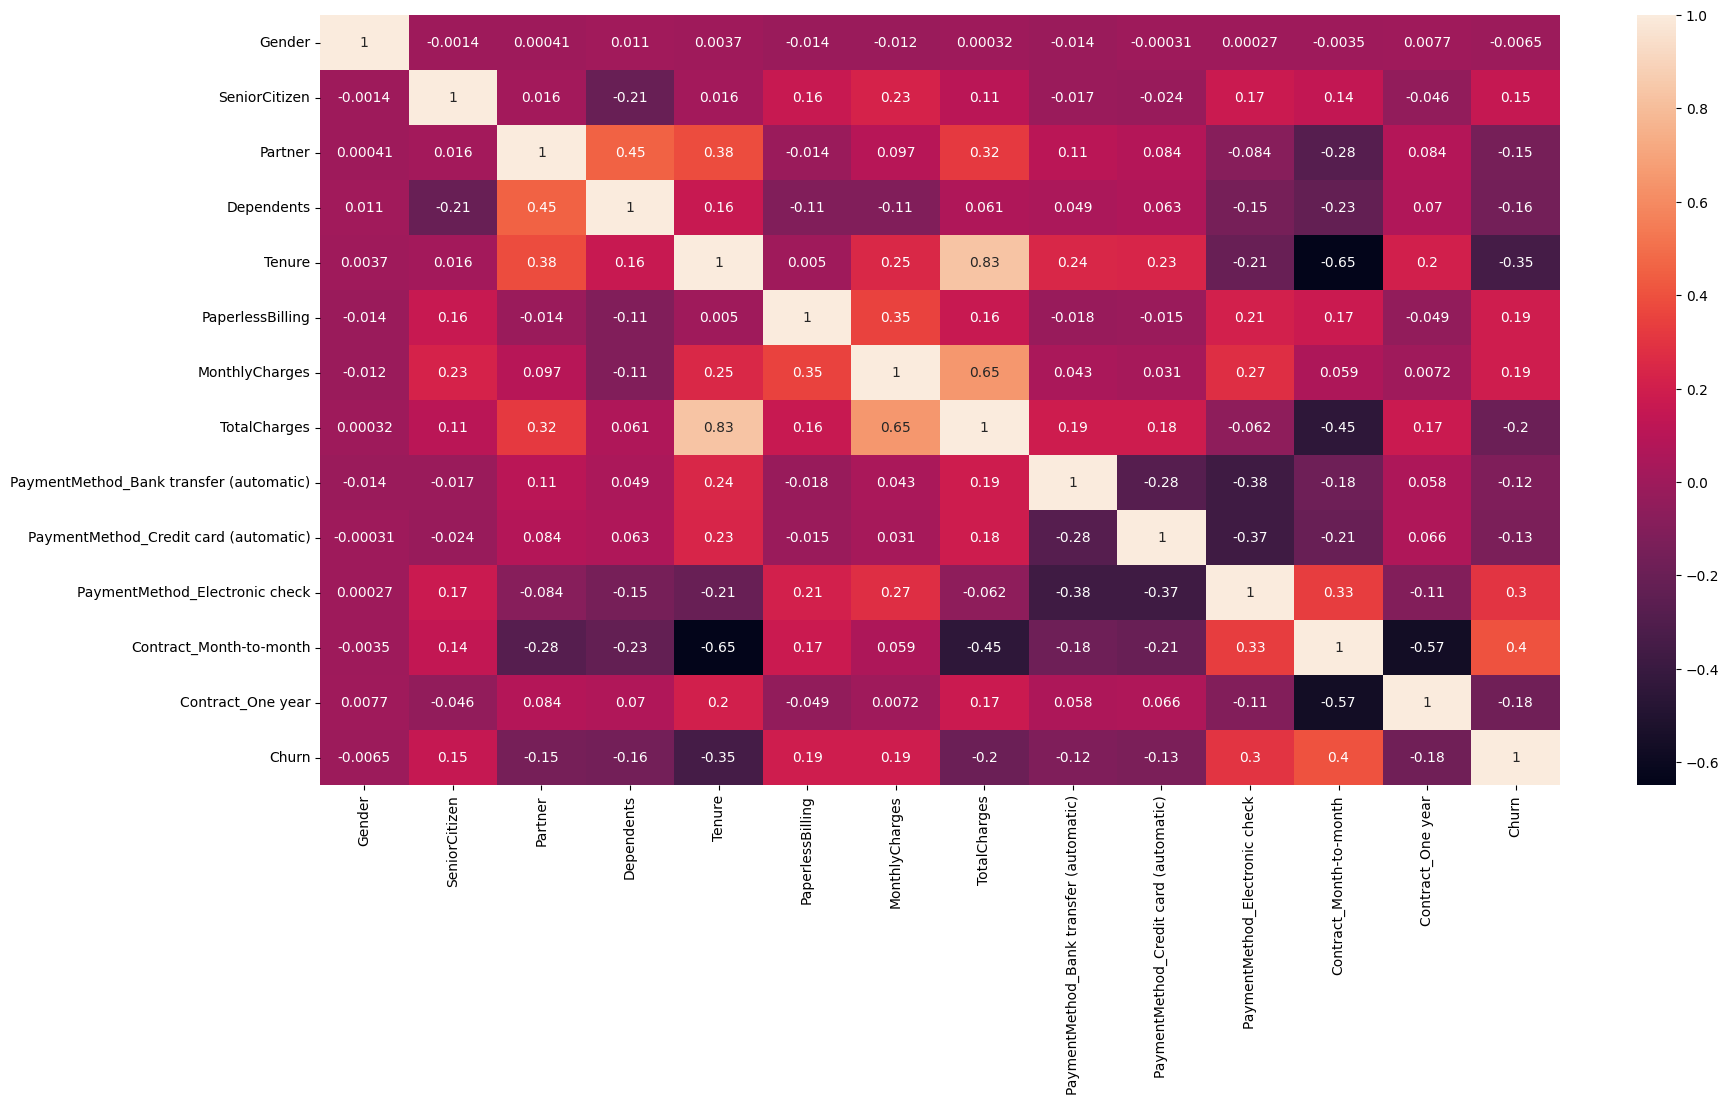

In [ ]:
correlation = pd.concat([feature, target], axis=1)

plt.figure(figsize=(20,10))
sns.heatmap(correlation.corr(), annot=True)

Observations:
- It seems there is a strong correlation (above 0.8) between `TotalCharges` and `Tenure.` We'll address this later after creating the baseline model.

## **1. Baseline Model**

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score
from sklearn.metrics import classification_report

X_pretrain, X_val, y_pretrain, y_val = train_test_split(feature,
                                                        target,
                                                        test_size=0.2,
                                                        random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_pretrain,
                                                    y_pretrain,
                                                    test_size=0.2,
                                                    random_state=42)

# Original feature and target shape of our dataset
print('Shape of original feature data : {}'.format(feature.shape))
print('Shape of original target data : {}'.format(target.shape))
print()

# Shape of X_train and y_train data
print('Shape of X_train data : {}'.format(X_train.shape))
print('Shape of y_train data : {}'.format(y_train.shape))
print()

# Shape of X_test and y_test data
print('Shape of X_test data : {}'.format(X_test.shape))
print('Shape of y_test data : {}'.format(y_test.shape))
print()

# Shape of X_val and y_val data
print('Shape of X_val data : {}'.format(X_val.shape))
print('Shape of y_val data : {}'.format(y_val.shape))
print()

Shape of original feature data : (6898, 13)
Shape of original target data : (6898,)

Shape of X_train data : (4414, 13)
Shape of y_train data : (4414,)

Shape of X_test data : (1104, 13)
Shape of y_test data : (1104,)

Shape of X_val data : (1380, 13)
Shape of y_val data : (1380,)



In [ ]:
# Model fitting and calculation
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Decision tree classifier
tree = DecisionTreeClassifier()
tree.fit(X_train.to_numpy(), y_train.to_numpy())

# Random forest classifier
forest = RandomForestClassifier()
forest.fit(X_train.to_numpy(), y_train.to_numpy())

RandomForestClassifier()

In [ ]:
def confusion_matrix_viz(model, X_train, X_test, X_val, y_train, y_test, y_val):

    name = type(model).__name__
    name = re.findall('[A-Z][^A-Z]*', name)
    model_name = ''.join(name[:-1])

    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    categories = ['No Churn', 'Churn']

    data_label = ['Training', 'Test', 'Validation']

    X = [X_train, X_test, X_val]
    y = [y_train, y_test, y_val]

    fig, axs = plt.subplots(1, 3, figsize=(20,5))

    for i, axes in enumerate(axs.flatten()):
        y_pred = model.predict(X[i])
        cm = confusion_matrix(y[i], y_pred)

        group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
        group_percentage = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]

        labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentage)]
        labels = np.asarray(labels).reshape(2,2)

        plot = sns.heatmap(cm, annot=labels, fmt='',
                           ax = axes, cmap='Blues', cbar = True,
                           xticklabels = categories, yticklabels=categories)
        plot.set(title = model_name + ' --- ' + data_label[i], xlabel='Predicted Value', ylabel='True Value')

### **Desicion Tree**

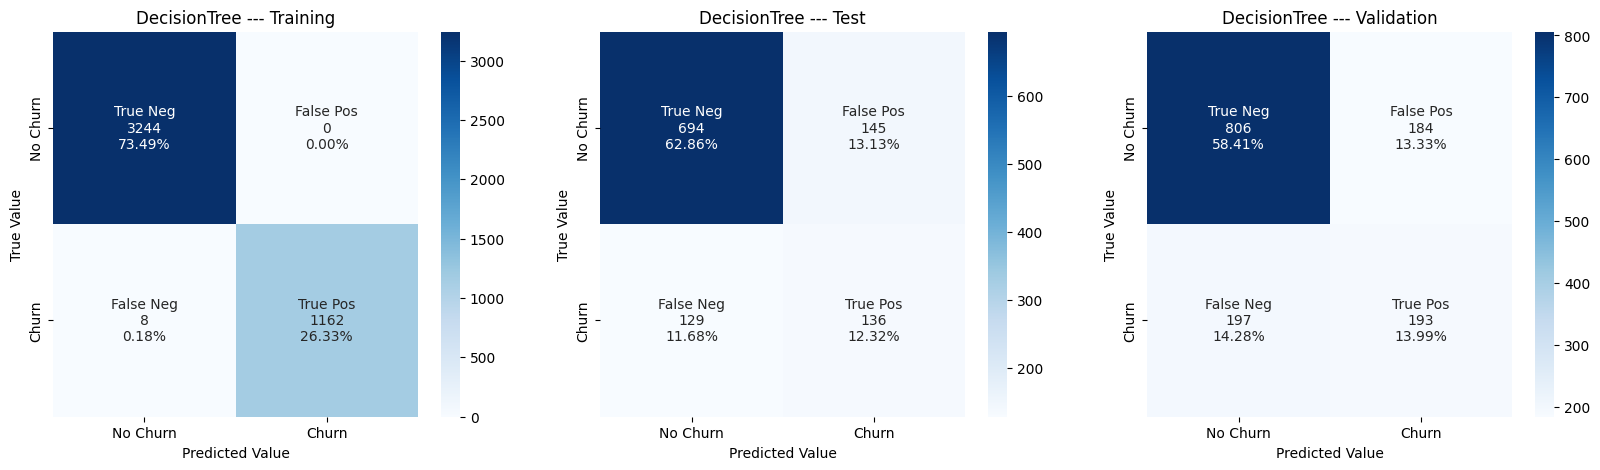

In [ ]:
confusion_matrix_viz(tree, X_train, X_test, X_val, y_train, y_test, y_val)

In [ ]:
y_pred = tree.predict(X_train)
labels = ['No Churn', 'Churn']

print(classification_report(y_train, y_pred, target_names= labels))

              precision    recall  f1-score   support

    No Churn       1.00      1.00      1.00      3244
       Churn       1.00      0.99      1.00      1170

    accuracy                           1.00      4414
   macro avg       1.00      1.00      1.00      4414
weighted avg       1.00      1.00      1.00      4414



In [ ]:
y_pred = tree.predict(X_test)
labels = ['No Churn', 'Churn']

print(classification_report(y_test, y_pred, target_names= labels))

              precision    recall  f1-score   support

    No Churn       0.84      0.83      0.84       839
       Churn       0.48      0.51      0.50       265

    accuracy                           0.75      1104
   macro avg       0.66      0.67      0.67      1104
weighted avg       0.76      0.75      0.75      1104



In [ ]:
y_pred = tree.predict(X_val)
labels = ['No Churn', 'Churn']

print(classification_report(y_val, y_pred, target_names= labels))

              precision    recall  f1-score   support

    No Churn       0.80      0.81      0.81       990
       Churn       0.51      0.49      0.50       390

    accuracy                           0.72      1380
   macro avg       0.66      0.65      0.66      1380
weighted avg       0.72      0.72      0.72      1380



**Observations:**
- The Decision Tree model performs exceptionally well on the Training dataset, indicating that the model effectively learns patterns and relationships within the training data.

- Despite the high performance on the Training dataset, there is a significant difference between the performance on Training compared to Test and Validation datasets. This suggests a possibility of overfitting, where the model overly memorizes the training data and fails to generalize patterns effectively on unseen data.

- The low precision, recall, and F1-score on the 'Churn' column of the Test and Validation datasets indicate that the model does not fully adapt to new data. The model tends to make false positive predictions or overlook positive cases that should be predicted, which can have serious consequences in practical applications, especially if prediction errors can have significant impacts.

In [ ]:
def feature_importance_viz(model, feature):

    name = type(model).__name__
    name = re.findall('[A-Z][^A-Z]*', name)
    model_name = ''.join(name[:-1])

    feature_importance = model.feature_importances_
    importance = pd.Series(feature_importance, index = feature.columns)

    fig, ax = plt.subplots(figsize=(7,7))
    importance.plot.barh(ax=ax)
    ax.set_title("Feature importances contribution of " + model_name)

    plt.show()

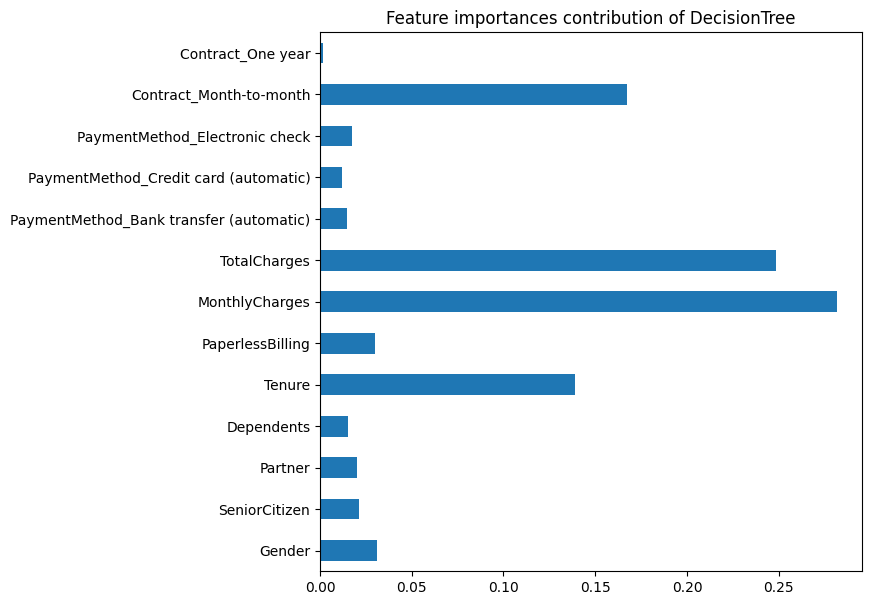

In [ ]:
feature_importance_viz(tree, feature)

Observations:
- The decision tree model shows that the most important features are MonthlyCharges, TotalCharges, and Contract month to month. These indicate that the monthly charges borne by the customer, the total charges incurred over the subscription period, and the length of the subscription significantly influence customers' decisions to stay subscribed or churn.

### **Random Forest**

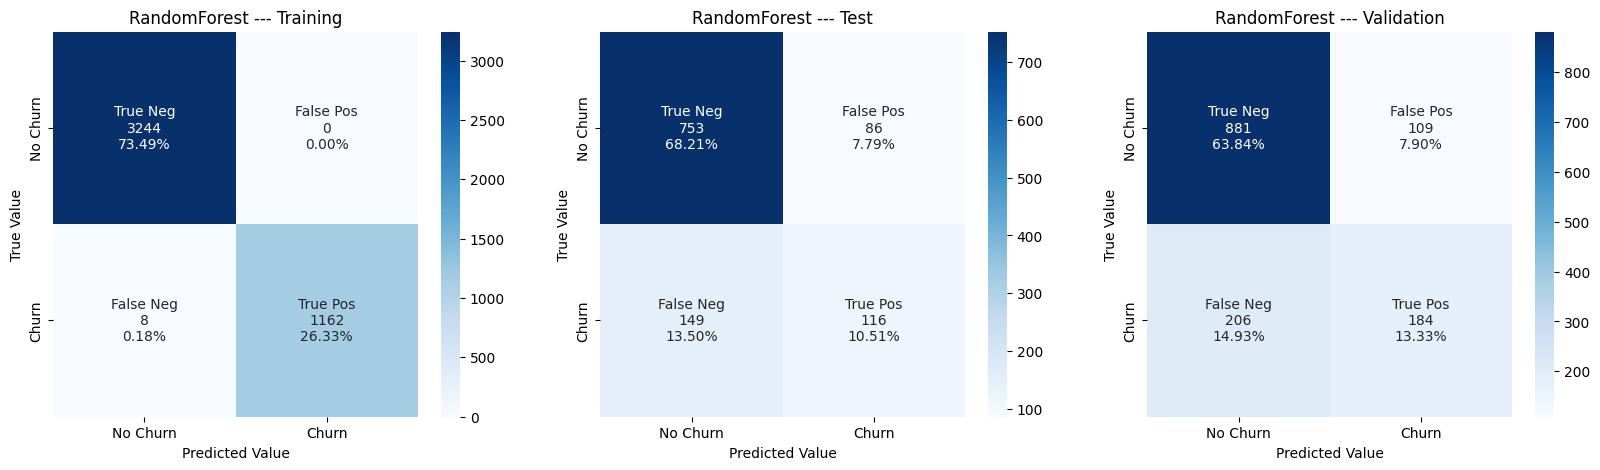

In [ ]:
confusion_matrix_viz(forest, X_train, X_test, X_val, y_train, y_test, y_val)

In [ ]:
y_pred = forest.predict(X_train)
labels = ['No Churn', 'Churn']

print(classification_report(y_train, y_pred, target_names= labels))

              precision    recall  f1-score   support

    No Churn       1.00      1.00      1.00      3244
       Churn       1.00      0.99      1.00      1170

    accuracy                           1.00      4414
   macro avg       1.00      1.00      1.00      4414
weighted avg       1.00      1.00      1.00      4414



In [ ]:
y_pred = forest.predict(X_test)
labels = ['No Churn', 'Churn']

print(classification_report(y_test, y_pred, target_names= labels))

              precision    recall  f1-score   support

    No Churn       0.83      0.90      0.87       839
       Churn       0.57      0.44      0.50       265

    accuracy                           0.79      1104
   macro avg       0.70      0.67      0.68      1104
weighted avg       0.77      0.79      0.78      1104



In [ ]:
y_pred = forest.predict(X_val)
labels = ['No Churn', 'Churn']

print(classification_report(y_val, y_pred, target_names= labels))

              precision    recall  f1-score   support

    No Churn       0.81      0.89      0.85       990
       Churn       0.63      0.47      0.54       390

    accuracy                           0.77      1380
   macro avg       0.72      0.68      0.69      1380
weighted avg       0.76      0.77      0.76      1380



Observations:
- The model also demonstrates excellent performance on the Training dataset, indicating that it's not underfitting.
- There's a tendency of overfitting in the Random Forest model, where it performs very well on the training data but struggles to generalize effectively to new data. However, the precision, recall, and f1-score values obtained are higher than those of the Decision Tree model, indicating better performance, especially in identifying customers who "Churn". These results also suggest that Random Forest can address the overfitting issues that Decision Tree might encounter and provide better generalization to new data.
- In the Random Forest model, the precision value is higher than recall, where precision exceeds recall, it suggests the model excels in accurately identifying customers who are likely to churn among all predicted churn cases, aiding targeted retention efforts and minimizing false churn predictions.

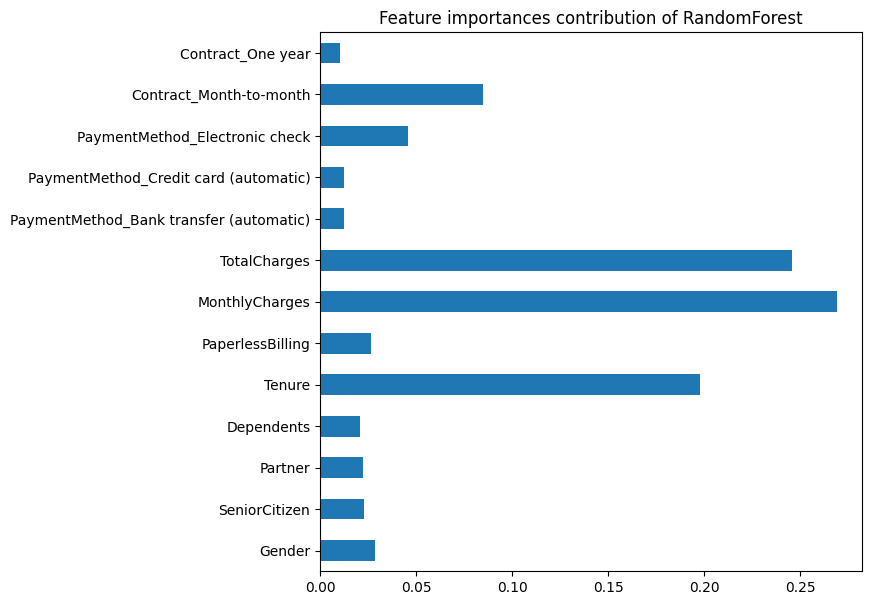

In [ ]:
feature_importance_viz(forest, feature)

Observations:
- It seems like both the decision tree and random forest models agree on the most important features: MonthlyCharges, TotalCharges, and Tenure. This underscores that how much customers pay each month, the total they've paid over time, and how long they've been subscribed significantly impact whether they stay or churn.

## **2. Hyperparameter Tuning + Baseline Model**

Here, we are going to tune our hyperparameter for Decision Tree, Random Forest, and Xgboost before handling imbalanced dataset. This model can be our baseline model

### Decision Tree Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters_tree = {'criterion' : ['gini', 'entropy'],
                   'max_depth' : [2, 3, 5, 7, 9, 11],
                   'min_samples_split' : [2, 4, 6],
                   'max_leaf_nodes' : [3, 5, 7, 9, 11, 13, 15, 17, 19]}

tree_hyper = DecisionTreeClassifier(random_state = 42)

gridcv_tree = GridSearchCV(tree_hyper, parameters_tree, cv=5,
                           scoring = 'recall', n_jobs=-1)

# conduct grid search over the parameter space
start_time = time.time()

gridcv_tree.fit(X_train,y_train)

duration = time.time() - start_time

In [ ]:
# the compact results
cv_result = pd.DataFrame(gridcv_tree.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score', ascending=True)

,params,mean_test_score,rank_test_score
179,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.629060,1
299,"{'criterion': 'entropy', 'max_depth': 11, 'max...",0.629060,1
298,"{'criterion': 'entropy', 'max_depth': 11, 'max...",0.629060,1
297,"{'criterion': 'entropy', 'max_depth': 11, 'max...",0.629060,1
272,"{'criterion': 'entropy', 'max_depth': 9, 'max_...",0.629060,1
...,...,...,...
221,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.396581,277
219,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.396581,277
215,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",0.396581,277
213,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",0.396581,277


In [ ]:
# show best parameter configuration found for classifier
print('Best parameters for Decision Tree : {}'.format(gridcv_tree.best_params_))
print('Computation time : %.2f' %duration)

Best parameters for Decision Tree : {'criterion': 'entropy', 'max_depth': 2, 'max_leaf_nodes': 3, 'min_samples_split': 2}
Computation time : 19.90


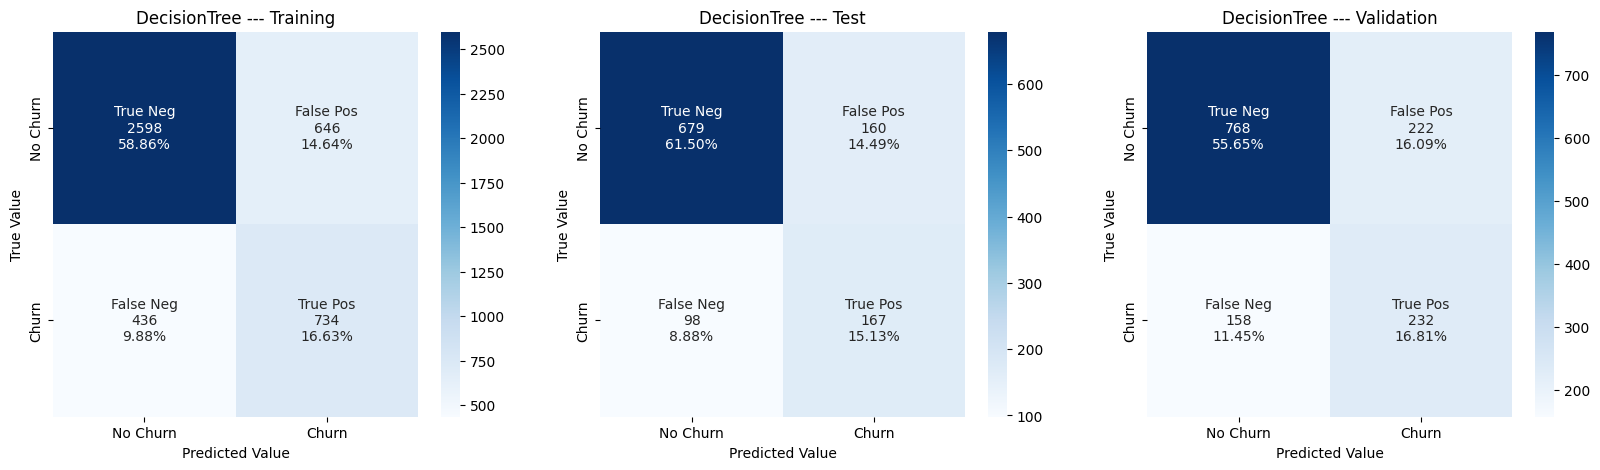

In [ ]:
tree_best = gridcv_tree.best_estimator_
confusion_matrix_viz(tree_best, X_train, X_test, X_val, y_train, y_test, y_val)

In [ ]:
y_pred = tree_best.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      3244
           1       0.53      0.63      0.58      1170

    accuracy                           0.75      4414
   macro avg       0.69      0.71      0.70      4414
weighted avg       0.77      0.75      0.76      4414



In [ ]:
y_pred = tree_best.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       839
           1       0.51      0.63      0.56       265

    accuracy                           0.77      1104
   macro avg       0.69      0.72      0.70      1104
weighted avg       0.79      0.77      0.77      1104



In [ ]:
y_pred = tree_best.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       990
           1       0.51      0.59      0.55       390

    accuracy                           0.72      1380
   macro avg       0.67      0.69      0.68      1380
weighted avg       0.74      0.72      0.73      1380



Observations:
- The decision tree directly performed hyperparameter tuning, resulting in a lower score during training compared to the previous high F1-score of 1.00 in the baseline model, which dropped to 0.58 for Churn.
- The test and validation data show results that are not significantly different from the training data, indicating that hyperparameter tuning can better handle cases of overfitting and slightly increase the F1-score in the validation and test data.

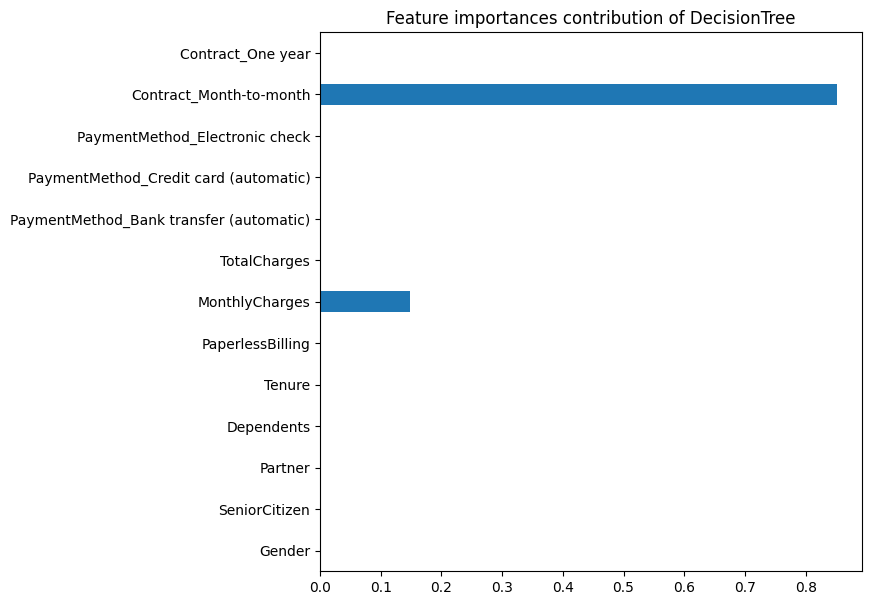

In [ ]:
feature_importance_viz(tree_best, feature)

Observations:
- This model emphasizes that `Contract-Month-to-Month` and `MonthlyCharges` are the most influential factors, whereas in the previous decision tree baseline model,` MonthlyCharges`, `TotalCharges`, and `Tenure` had significant influence.

### Random Forest Hyperparameter Tuning

In [ ]:
# Defined criterion
criterion = ['gini', 'entropy']

# Number of features to consider at every split
max_features = ['sqrt', 'log2']

# Maximum number of levels in tree
max_depth = [2, 3, 5, 7, 9, 11]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
parameters_forest = {'criterion' : criterion,
                     'max_features': max_features,
                     'max_depth': max_depth,
                     'min_samples_split': min_samples_split,
                     'min_samples_leaf': min_samples_leaf}
parameters_forest

{'criterion': ['gini', 'entropy'],
 'max_features': ['sqrt', 'log2'],
 'max_depth': [2, 3, 5, 7, 9, 11],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [ ]:
forest_hyper = RandomForestClassifier(random_state = 42)


gridcv_forest = GridSearchCV(forest_hyper, parameters_forest, cv=5,
                             scoring = 'recall', n_jobs=-1)

# conduct grid search over the parameter space
start_time = time.time()

gridcv_forest.fit(X_train,y_train)

duration = time.time() - start_time

In [ ]:
# the compact results
cv_result = pd.DataFrame(gridcv_forest.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score', ascending=True)

,params,mean_test_score,rank_test_score
104,"{'criterion': 'gini', 'max_depth': 11, 'max_fe...",0.500855,1
95,"{'criterion': 'gini', 'max_depth': 11, 'max_fe...",0.500855,1
214,"{'criterion': 'entropy', 'max_depth': 11, 'max...",0.500000,3
213,"{'criterion': 'entropy', 'max_depth': 11, 'max...",0.500000,3
205,"{'criterion': 'entropy', 'max_depth': 11, 'max...",0.500000,3
...,...,...,...
111,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.127350,199
109,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.127350,199
110,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.127350,199
117,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.127350,199


In [ ]:
# show best parameter configuration found for classifier
print('Best parameters for Decision Tree : {}'.format(gridcv_forest.best_params_))
print('Computation time : %.2f' %duration)

Best parameters for Decision Tree : {'criterion': 'gini', 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}
Computation time : 331.03


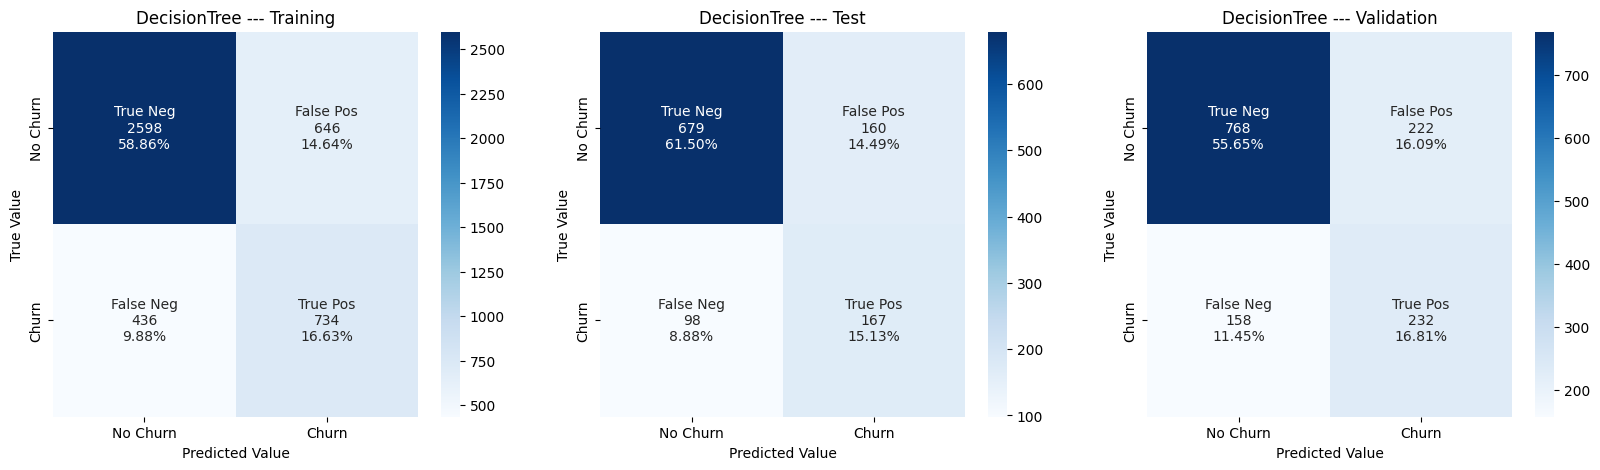

In [ ]:
forest_best = gridcv_forest.best_estimator_
confusion_matrix_viz(tree_best, X_train, X_test, X_val, y_train, y_test, y_val)

In [ ]:
y_pred = forest_best.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      3244
           1       0.83      0.64      0.72      1170

    accuracy                           0.87      4414
   macro avg       0.86      0.79      0.82      4414
weighted avg       0.87      0.87      0.86      4414



In [ ]:
y_pred = forest_best.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       839
           1       0.63      0.44      0.52       265

    accuracy                           0.80      1104
   macro avg       0.74      0.68      0.70      1104
weighted avg       0.79      0.80      0.79      1104



In [ ]:
y_pred = forest_best.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       990
           1       0.64      0.45      0.53       390

    accuracy                           0.77      1380
   macro avg       0.72      0.67      0.69      1380
weighted avg       0.76      0.77      0.76      1380



Observations:
- In this hyperparameter-tuned random forest model, a lower F1-score is obtained compared to the random forest model without hyperparameter tuning, yet it remains higher than the decision tree model with hyperparameter tuning.
- The F1-score obtained in the test and validation sets is slightly higher than the random forest model without hyperparameter tuning and higher than the decision tree model.

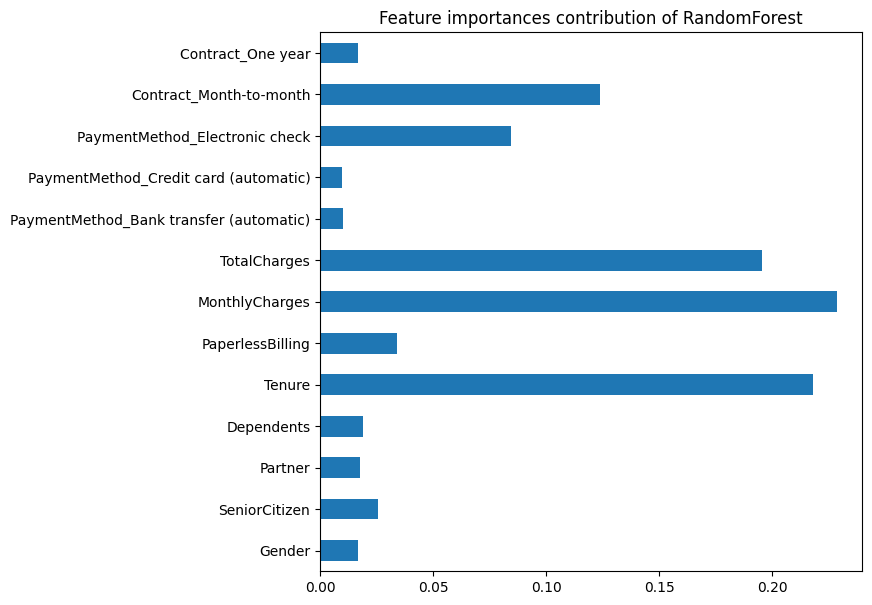

In [ ]:
feature_importance_viz(forest_best, feature)

Observations:
- The random forest model with hyperparameter tuning shows the same important features as the random forest model without hyperparameter tuning, namely three features: MonthlyCharges, TotalCharges, and Tenure.

## **Pre-Processing**

### **VIF Score Handling**

In [ ]:
calculate_vif(feature)

,feature,vif_score
1,Gender,1.000961
2,SeniorCitizen,1.132377
3,Partner,1.463645
4,Dependents,1.377666
5,Tenure,7.437790
6,PaperlessBilling,1.194019
7,MonthlyCharges,4.015121
8,TotalCharges,9.934806
9,PaymentMethod_Bank transfer (automatic),1.793364
10,PaymentMethod_Credit card (automatic),1.765395


In [ ]:
# Drop MonthlyCharges and TotalCharges since their vif score are high/ high correlated
feature = feature.drop(columns='TotalCharges', axis=1)

In [ ]:
calculate_vif(feature)

,feature,vif_score
1,Gender,1.000865
2,SeniorCitizen,1.131952
3,Partner,1.463335
4,Dependents,1.377257
5,Tenure,2.509355
6,PaperlessBilling,1.193489
7,MonthlyCharges,1.487157
8,PaymentMethod_Bank transfer (automatic),1.769404
9,PaymentMethod_Credit card (automatic),1.748740
10,PaymentMethod_Electronic check,2.046620


<Axes: >

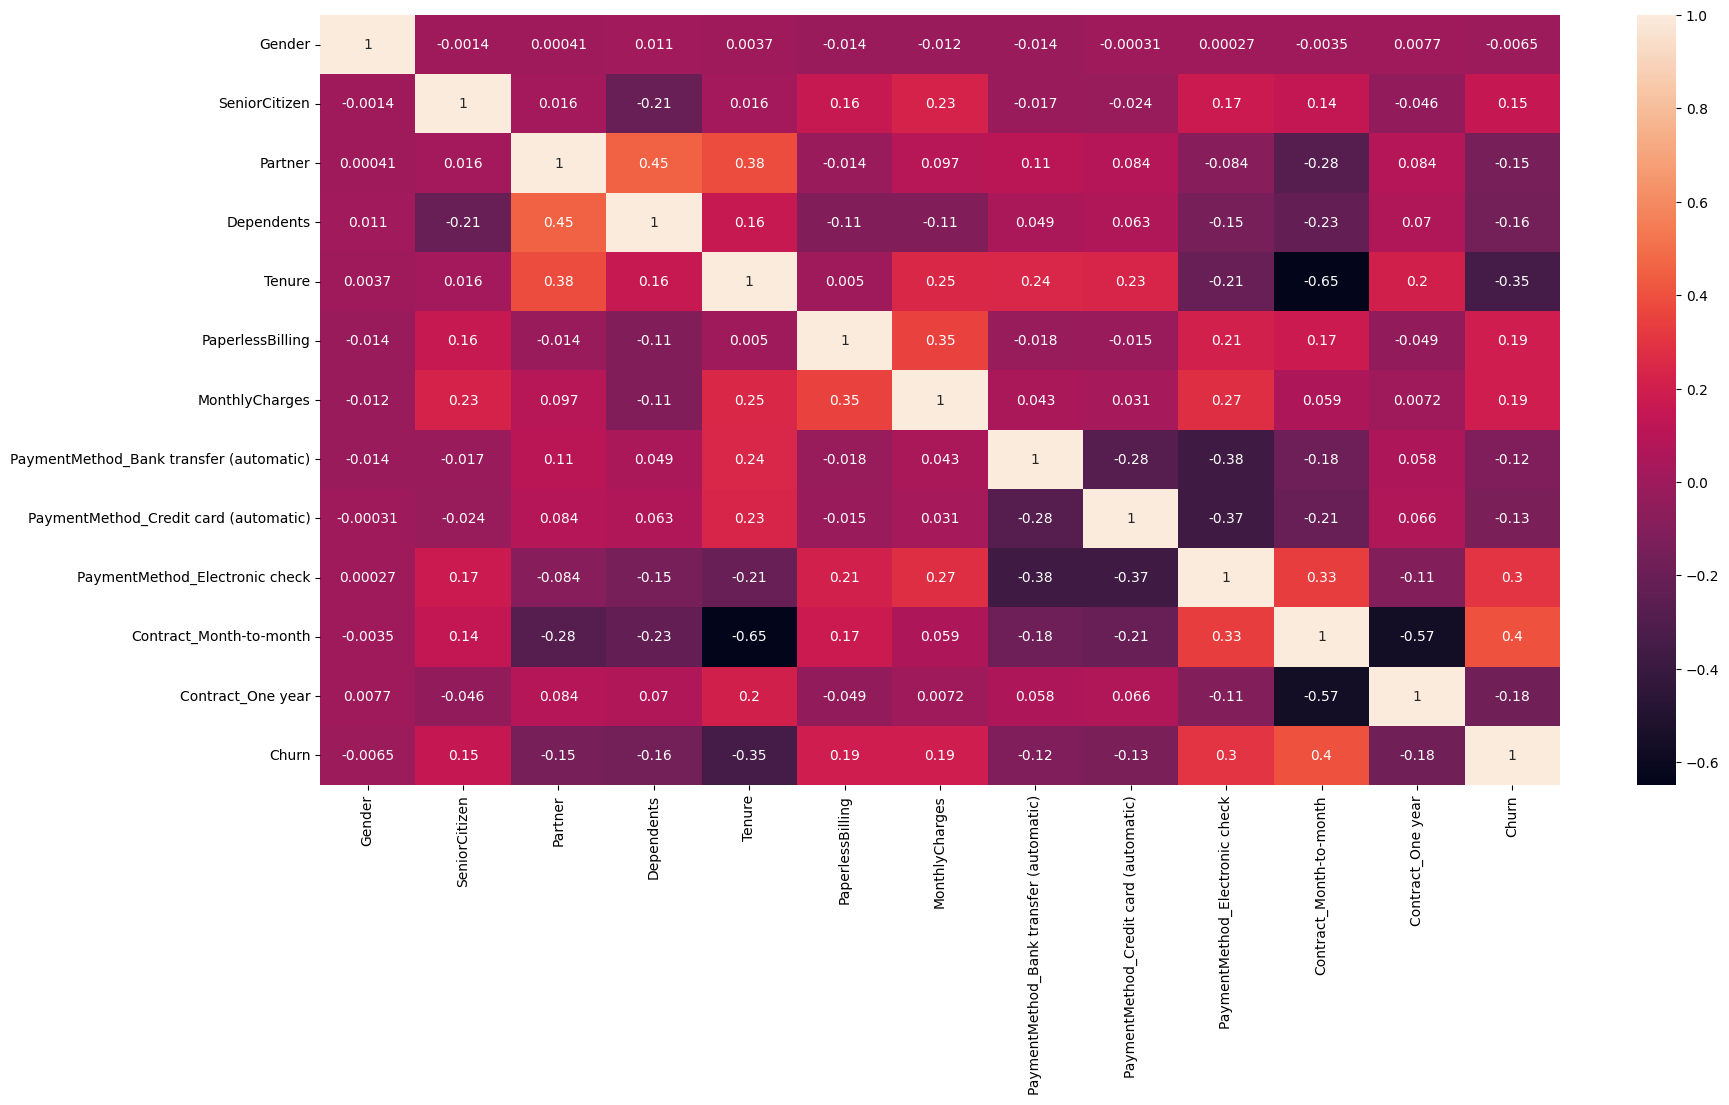

In [ ]:
correlation = pd.concat([feature, target], axis=1)

plt.figure(figsize=(20,10))
sns.heatmap(correlation.corr(), annot=True)

### **Imbalanced data handling**

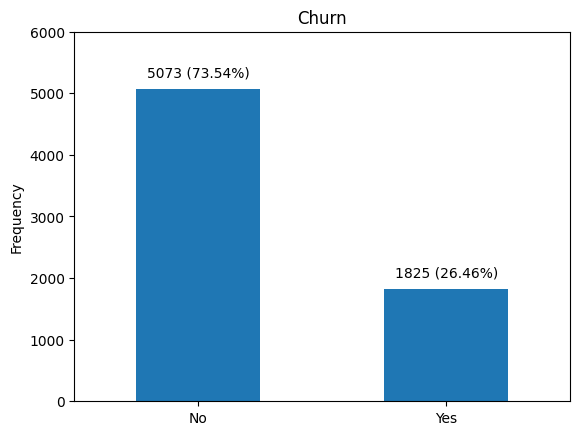

In [ ]:
def imbalanced_viz(target):
    target_class = target.map({0 : 'No', 1 : 'Yes'})

    target_class.value_counts().plot(kind='bar', title='Churn')
    plt.tick_params(axis='x', rotation=0)
    plt.xlabel('')
    plt.ylabel('Frequency')

    counts = target_class.value_counts()
    percentage = counts / np.sum(counts) * 100

    labels = [str(counts[0]) + " (" + f'{percentage[0]:.2f}' + '%' + ")",
              str(counts[1]) + " (" + f'{percentage[1]:.2f}' + '%' + ")"]

    for i in range(len(labels)):
        plt.text(i, counts[i] + 200, labels[i],
                 ha='center', color = 'black', fontsize=10)

    plt.ylim(0,6000)
    plt.show()

imbalanced_viz(target)

There is an imbalance in the number of churn and non-churn instances, with 5073 "no" and 1825 "yes" instances. We need to adjust the number of instances by performing oversampling.

### **SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE


X_pretrain, X_val, y_pretrain, y_val = train_test_split(feature, target,
                                                        test_size=0.2,
                                                        random_state = 42)

# do oversampling using smote
smote = SMOTE(random_state=42, k_neighbors=5)
X_resample, y_resample = smote.fit_resample(X_pretrain, y_pretrain)

# do split again
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample,
                                                    test_size=0.2,
                                                    random_state = 42)


# Training data shape after SMOTE
print('Shape of X_train after SMOTE : {}'.format(X_train.shape))
print('Shape of y_train after SMOTE : {}'.format(y_train.shape))
print()

# Testing data shape after SMOTE
print('Shape of X_test after SMOTE : {}'.format(X_test.shape))
print('Shape of y_test after SMOTE : {}'.format(y_test.shape))
print()

# Valication data shape before SMOTE, this is set as a unlooked up data from machine learning model
print('Shape of X_val before SMOTE : {}'.format(X_val.shape))
print('Shape of y_val before SMOTE : {}'.format(y_val.shape))

Shape of X_train after SMOTE : (6532, 12)
Shape of y_train after SMOTE : (6532,)

Shape of X_test after SMOTE : (1634, 12)
Shape of y_test after SMOTE : (1634,)

Shape of X_val before SMOTE : (1380, 12)
Shape of y_val before SMOTE : (1380,)


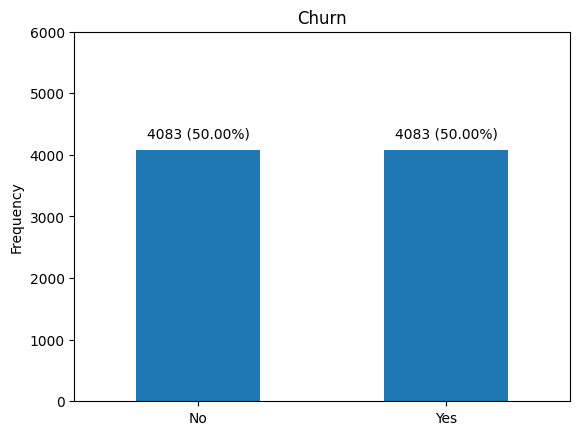

In [ ]:
imbalanced_viz(y_resample)

Great! Now the dataset is balanced

## **3. Pre-Processing + Baseline Model**

In [ ]:
# Decision tree classifier
tree_smote = DecisionTreeClassifier()
tree_smote.fit(X_train, y_train)

# Random forest classifier
forest_smote = RandomForestClassifier()
forest_smote.fit(X_train, y_train)

RandomForestClassifier()

### **Decission Tree**

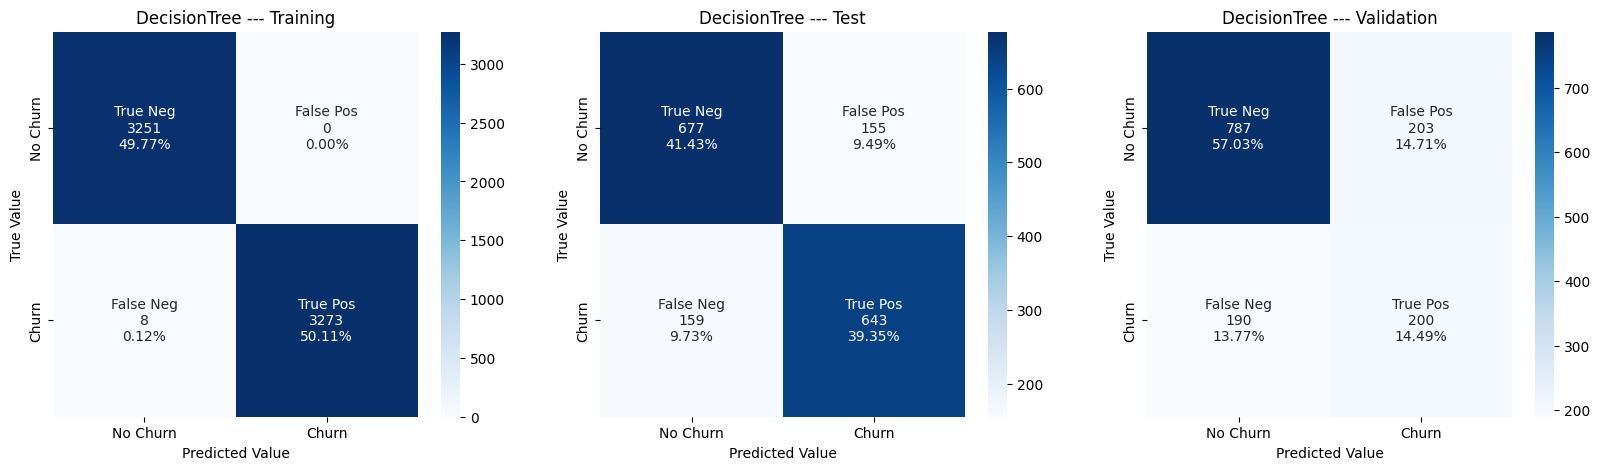

In [ ]:
confusion_matrix_viz(tree_smote, X_train, X_test, X_val, y_train, y_test, y_val)

In [ ]:
y_pred = tree_smote.predict(X_train)
labels = ['No Churn', 'Churn']

print(classification_report(y_train, y_pred, target_names= labels))

              precision    recall  f1-score   support

    No Churn       1.00      1.00      1.00      3251
       Churn       1.00      1.00      1.00      3281

    accuracy                           1.00      6532
   macro avg       1.00      1.00      1.00      6532
weighted avg       1.00      1.00      1.00      6532



In [ ]:
y_pred = tree_smote.predict(X_test)
labels = ['No Churn', 'Churn']

print(classification_report(y_test, y_pred, target_names= labels))

              precision    recall  f1-score   support

    No Churn       0.81      0.81      0.81       832
       Churn       0.81      0.80      0.80       802

    accuracy                           0.81      1634
   macro avg       0.81      0.81      0.81      1634
weighted avg       0.81      0.81      0.81      1634



In [ ]:
y_pred = tree_smote.predict(X_val)
labels = ['No Churn', 'Churn']

print(classification_report(y_val, y_pred, target_names= labels))

              precision    recall  f1-score   support

    No Churn       0.81      0.79      0.80       990
       Churn       0.50      0.51      0.50       390

    accuracy                           0.72      1380
   macro avg       0.65      0.65      0.65      1380
weighted avg       0.72      0.72      0.72      1380



### Observations:
1. **High Training Performance**: The decision tree model that underwent preprocessing has shown excellent training performance, similar to the baseline model, achieving an F1-score of 1.00. This indicates that the model perfectly classified all training samples.

2. **Improved Test Performance**: The decision tree model that was preprocessed also shows a significant improvement in the F1-score on the test data, increasing to 0.80. This improvement suggests that using SMOTE to balance the test data has resulted in better performance. Therefore, we will focus on validation data rather than this test data to compare the model's performance more effectively.

3. **Performance Difference Between Training and Validation**: Despite the high performance in the training set after applying SMOTE, there is a noticeable difference in performance between training and validation, particularly concerning the 'churn' data. This suggests that even with SMOTE, there might be overfitting occurring — the model may be memorizing the training data too specifically and failing to generalize effectively to unseen data. The F1-score of this model is also lower compared to a decision tree model that has undergone hyperparameter tuning.

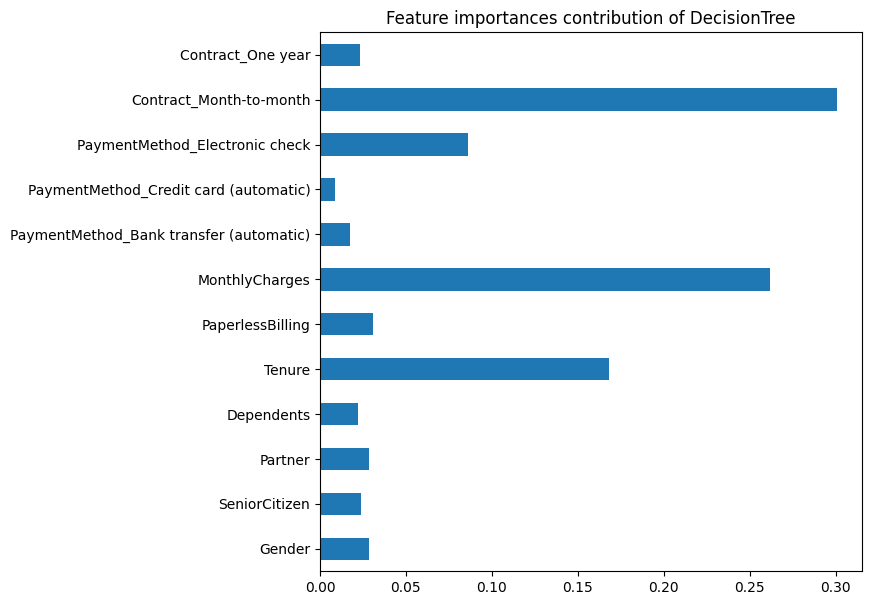

In [ ]:
feature_importance_viz(tree_smote, feature)

### Observations:
- **Important Features**: This model highlights `Contract Month-to-Month`, `'MonthlyCargers'`, and `'Tenure'` as key features influencing its decisions. This differs from the previous model, which only identified `Contract Month-to-Month` and `MonthlyCharges`' as important.

### **Random Forest**

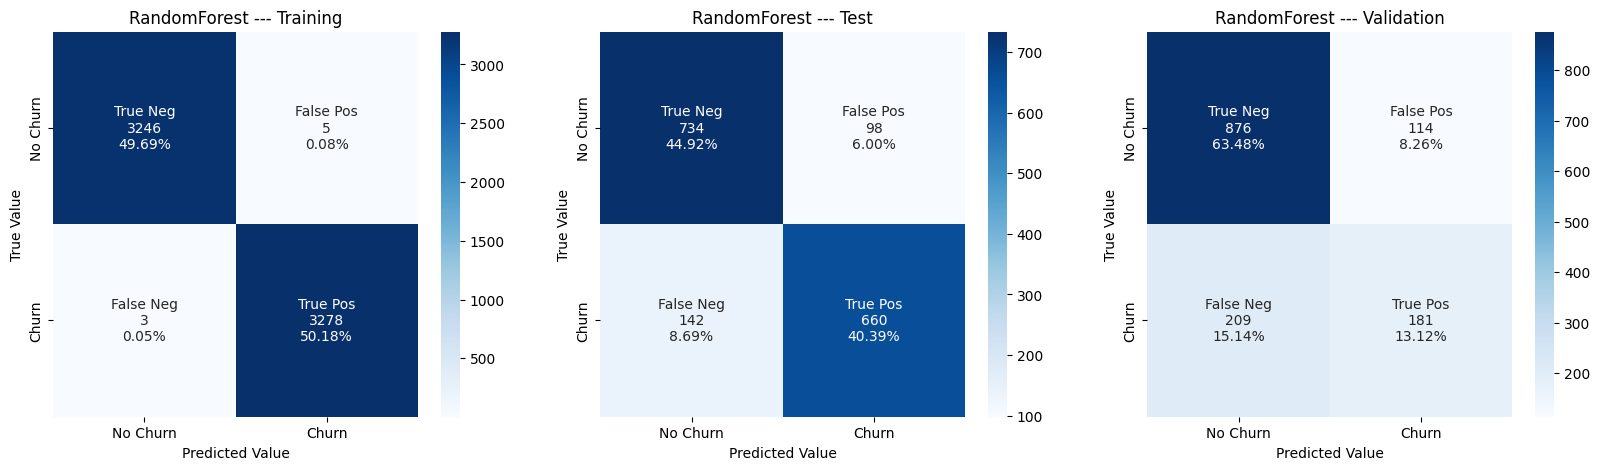

In [ ]:
confusion_matrix_viz(forest_smote, X_train, X_test, X_val, y_train, y_test, y_val)

In [ ]:
y_pred = forest_smote.predict(X_train)
labels = ['No Churn', 'Churn']

print(classification_report(y_train, y_pred, target_names= labels))

              precision    recall  f1-score   support

    No Churn       1.00      1.00      1.00      3251
       Churn       1.00      1.00      1.00      3281

    accuracy                           1.00      6532
   macro avg       1.00      1.00      1.00      6532
weighted avg       1.00      1.00      1.00      6532



In [ ]:
y_pred = forest_smote.predict(X_test)
labels = ['No Churn', 'Churn']

print(classification_report(y_test, y_pred, target_names= labels))

              precision    recall  f1-score   support

    No Churn       0.84      0.88      0.86       832
       Churn       0.87      0.82      0.85       802

    accuracy                           0.85      1634
   macro avg       0.85      0.85      0.85      1634
weighted avg       0.85      0.85      0.85      1634



In [ ]:
y_pred = forest_smote.predict(X_val)
labels = ['No Churn', 'Churn']

print(classification_report(y_val, y_pred, target_names= labels))

              precision    recall  f1-score   support

    No Churn       0.81      0.88      0.84       990
       Churn       0.61      0.46      0.53       390

    accuracy                           0.77      1380
   macro avg       0.71      0.67      0.69      1380
weighted avg       0.75      0.77      0.76      1380



### Observations:
- **High Training Performance**: The preprocessed random forest model exhibits excellent training performance, achieving an F1-score of 1.00, similar to the previously mentioned preprocessed decision tree model. This perfect score suggests that the model has perfectly classified all training samples, but it also raises concerns about potential overfitting.

- **Improved Test Performance**: The preprocessed decision tree model shows a significant improvement in F1-score on the test data, increasing to 0.84. This improvement indicates that using SMOTE to balance the test data has effectively enhanced the model's performance. As a result, the focus will be shifted from the test data to the validation data to better compare model performance across different setups.

- **Discrepancy Between Training and Validation Performance**: Despite the high performance in the training dataset post-SMOTE, there is a noticeable performance gap between training and validation datasets, particularly on 'churn' data. This suggests that even after applying SMOTE, there is still a potential issue of overfitting, where the model memorizes the training data too specifically and fails to generalize effectively to unseen data. Compared to the non-preprocessed but hyperparameter-tuned random forest model, this preprocessed model shows a slightly higher F1-score, indicating a better performance than both the non-preprocessed model and the decision tree model.

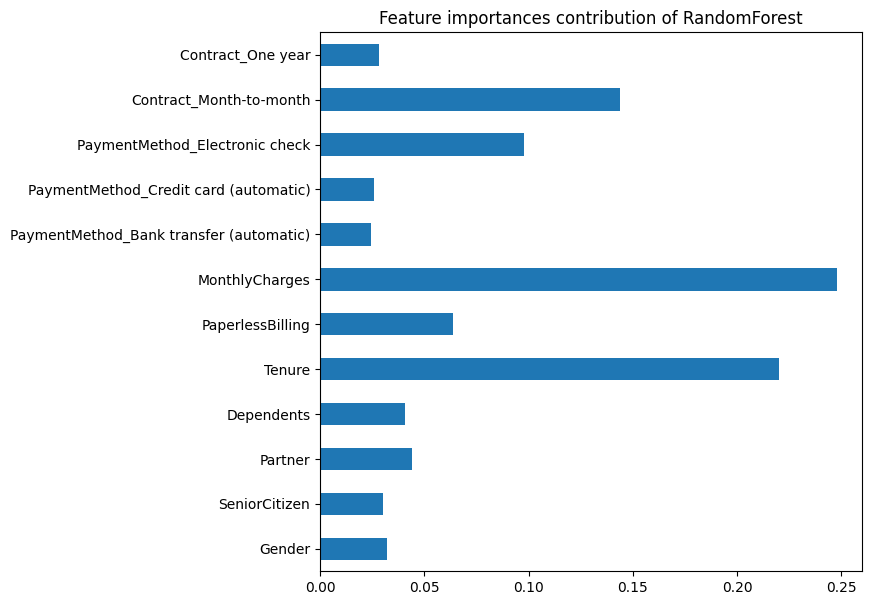

In [ ]:
feature_importance_viz(forest_smote, feature)

Observations:
- Key Features Identified: The preprocessed model highlights three important features: `MonthlyCharger`, `Tenure`, and `Contract Month-to-Month.` This insight is valuable as it points to the factors most influential in predicting outcomes with this model.

## **4. Hyperparameter Tuning + Processing + Baseline Model**

### Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters_tree = {'criterion' : ['gini', 'entropy'],
                   'max_depth' : [2, 3, 5, 7, 9, 11],
                   'min_samples_split' : [2, 4, 6],
                   'max_leaf_nodes' : [3, 5, 7, 9, 11, 13, 15, 17, 19]}

tree_hyper = DecisionTreeClassifier(random_state = 42)

gridcv_tree = GridSearchCV(tree_hyper, parameters_tree, cv=5,
                           scoring = 'accuracy', n_jobs=-1)

# conduct grid search over the parameter space
start_time = time.time()

gridcv_tree.fit(X_train,y_train)

duration = time.time() - start_time

In [ ]:
# the compact results
cv_result = pd.DataFrame(gridcv_tree.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score', ascending=True)

,params,mean_test_score,rank_test_score
161,"{'criterion': 'gini', 'max_depth': 11, 'max_le...",0.811850,1
160,"{'criterion': 'gini', 'max_depth': 11, 'max_le...",0.811850,1
159,"{'criterion': 'gini', 'max_depth': 11, 'max_le...",0.811850,1
132,"{'criterion': 'gini', 'max_depth': 9, 'max_lea...",0.811850,1
133,"{'criterion': 'gini', 'max_depth': 9, 'max_lea...",0.811850,1
...,...,...,...
180,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.744797,226
181,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.744797,226
182,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.744797,226
175,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.744797,226


In [ ]:
# show best parameter configuration found for classifier
print('Best parameters for Decision Tree : {}'.format(gridcv_tree.best_params_))
print('Computation time : %.2f' %duration)

Best parameters for Decision Tree : {'criterion': 'gini', 'max_depth': 9, 'max_leaf_nodes': 19, 'min_samples_split': 2}
Computation time : 22.29


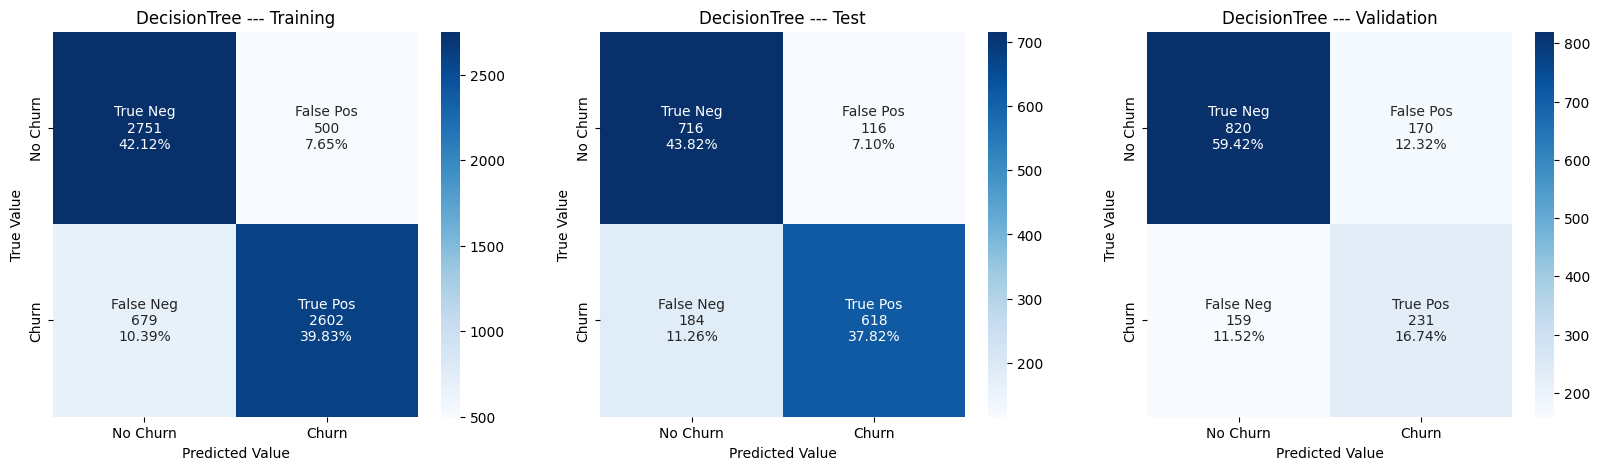

In [ ]:
tree_best = gridcv_tree.best_estimator_
confusion_matrix_viz(tree_best, X_train, X_test, X_val, y_train, y_test, y_val)

In [ ]:
y_pred = tree_best.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      3251
           1       0.84      0.79      0.82      3281

    accuracy                           0.82      6532
   macro avg       0.82      0.82      0.82      6532
weighted avg       0.82      0.82      0.82      6532



In [ ]:
y_pred = tree_best.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       832
           1       0.84      0.77      0.80       802

    accuracy                           0.82      1634
   macro avg       0.82      0.82      0.82      1634
weighted avg       0.82      0.82      0.82      1634



In [ ]:
y_pred = tree_best.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       990
           1       0.58      0.59      0.58       390

    accuracy                           0.76      1380
   macro avg       0.71      0.71      0.71      1380
weighted avg       0.76      0.76      0.76      1380



### Observations:
- **Training Performance**: The decision tree model that underwent both preprocessing and hyperparameter tuning shows a solid training score, with an F1-score of 0.82. This suggests a good fit to the training data without being perfect, which might help in avoiding severe overfitting.

- **Validation Performance**: The F1-score on the validation data is 0.58, which is higher than the scores achieved by the baseline decision tree model, the baseline model with hyperparameter tuning, and the baseline model with preprocessing alone. This indicates that the combined steps of preprocessing and hyperparameter tuning have effectively enhanced the model's performance in predicting customer churn.

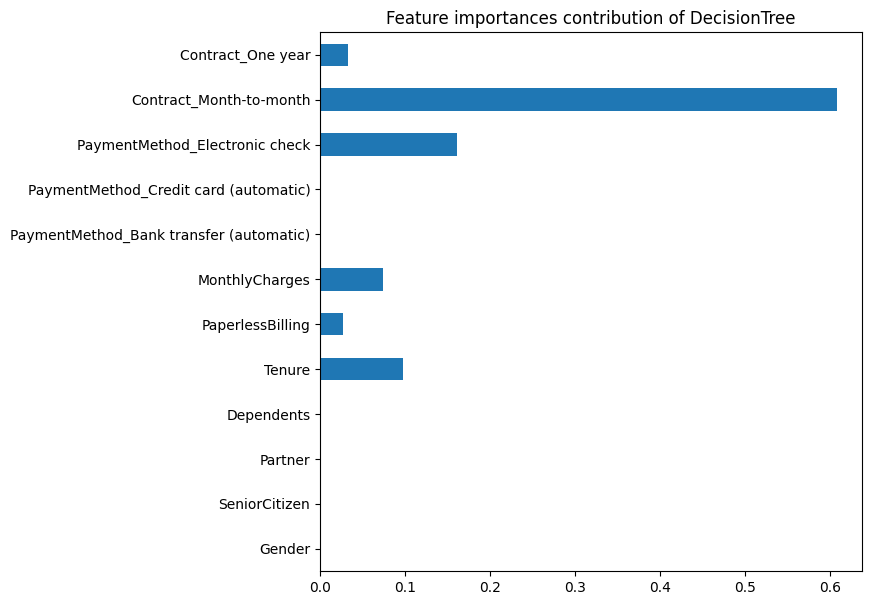

In [ ]:
feature_importance_viz(tree_best, feature)

### Observations:
- **Key Feature with Preprocessing and Tuning**: When combining preprocessing and hyperparameter tuning in the decision tree model, the feature 'Contract-month-to-month' stands out as particularly important. This suggests that the type of contract significantly influences customer churn, possibly because month-to-month contracts offer less commitment and easier exit options for customers.

- **Consistent Important Features Across Models**: Across all the decision tree models examined, the features 'Contract-month-to-month', 'MonthlyCharger', and 'Tenure' consistently emerge as crucial. This consistency across different model iterations and setups highlights these three features as critical for further analysis in the context of customer churn.

### Random Forest Hyperparameter Tuning

In [ ]:
# Defined criterion
criterion = ['gini', 'entropy']

# Number of features to consider at every split
max_features = ['sqrt', 'log2']

# Maximum number of levels in tree
max_depth = [2, 3, 5, 7, 9, 11]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
parameters_forest = {'criterion' : criterion,
                     'max_features': max_features,
                     'max_depth': max_depth,
                     'min_samples_split': min_samples_split,
                     'min_samples_leaf': min_samples_leaf}
parameters_forest

{'criterion': ['gini', 'entropy'],
 'max_features': ['sqrt', 'log2'],
 'max_depth': [2, 3, 5, 7, 9, 11],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [ ]:
forest_hyper = RandomForestClassifier(random_state = 42)


gridcv_forest = GridSearchCV(forest_hyper, parameters_forest, cv=5,
                             scoring = 'accuracy', n_jobs=-1)

# conduct grid search over the parameter space
start_time = time.time()

gridcv_forest.fit(X_train,y_train)

duration = time.time() - start_time

In [ ]:
# show best parameter configuration found for classifier
print('Best parameters for Decision Tree : {}'.format(gridcv_forest.best_params_))
print('Computation time : %.2f' %duration)

Best parameters for Decision Tree : {'criterion': 'entropy', 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
Computation time : 421.02


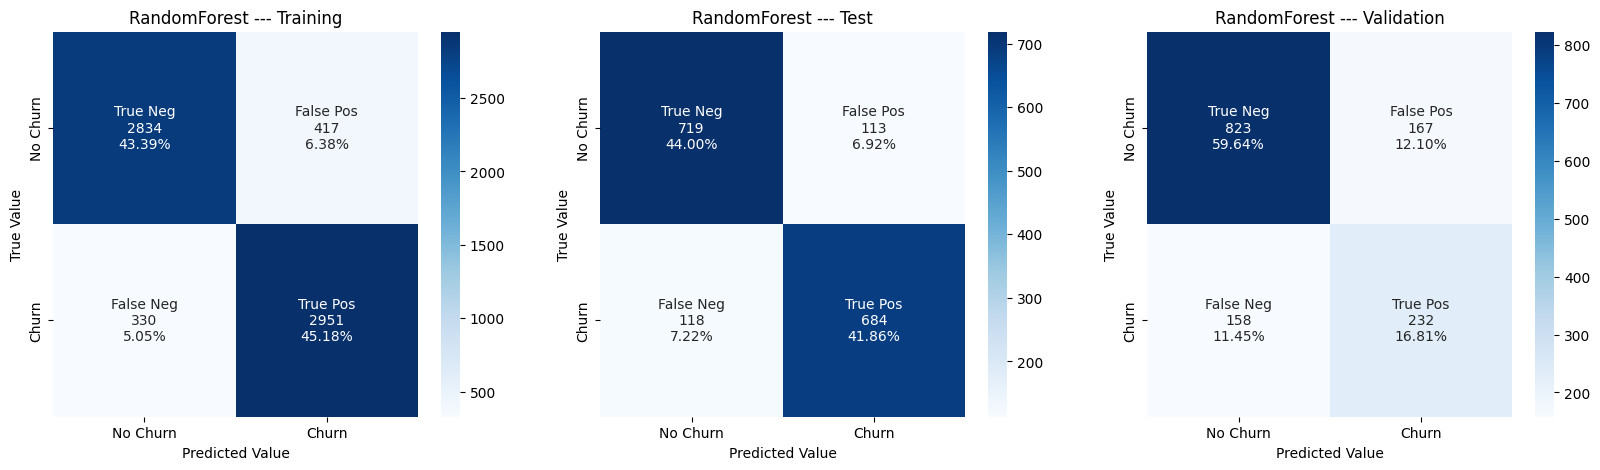

In [ ]:
forest_best = gridcv_forest.best_estimator_
confusion_matrix_viz(forest_best, X_train, X_test, X_val, y_train, y_test, y_val)

In [ ]:
y_pred = forest_best.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      3251
           1       0.88      0.90      0.89      3281

    accuracy                           0.89      6532
   macro avg       0.89      0.89      0.89      6532
weighted avg       0.89      0.89      0.89      6532



In [ ]:
y_pred = forest_best.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       832
           1       0.86      0.85      0.86       802

    accuracy                           0.86      1634
   macro avg       0.86      0.86      0.86      1634
weighted avg       0.86      0.86      0.86      1634



In [ ]:
y_pred = forest_best.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       990
           1       0.58      0.59      0.59       390

    accuracy                           0.76      1380
   macro avg       0.71      0.71      0.71      1380
weighted avg       0.77      0.76      0.77      1380



### Observations:
- **Training Performance of Random Forest**: The random forest model that underwent both preprocessing and hyperparameter tuning shows an excellent training performance with an F1-score of 0.89. This score is higher compared to the decision tree model, indicating a stronger ability of the random forest to capture complex patterns in the data without overfitting as severely as decision trees might.

- **Validation Performance**: The F1-score on the validation data is 0.59, which is higher than all previous iterations of both the random forest and decision tree models, whether they had undergone hyperparameter tuning, preprocessing, or were in their baseline forms. This indicates that the combination of preprocessing and hyperparameter tuning has significantly improved the model's ability to generalize to unseen data.

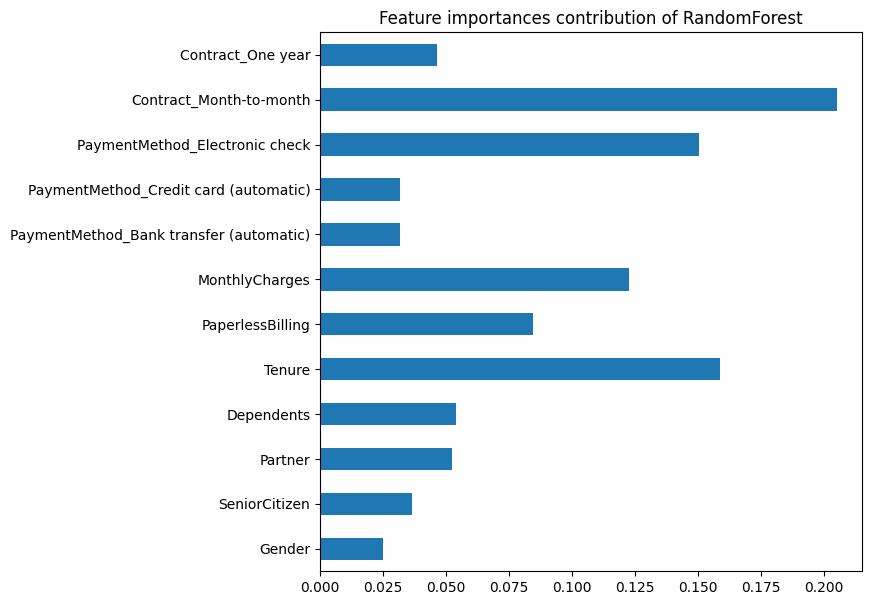

In [ ]:
feature_importance_viz(forest_best, feature)

### Observations:
- **Key Features in Enhanced Random Forest Model**: When applying preprocessing and hyperparameter tuning to the random forest model, the most important features identified are 'Contract-month-to-month', 'Monthly chargers', and 'Tenure'. These features have consistently appeared as crucial in influencing customer churn decisions, underscoring their significant impact.

- **Comparison with Decision Tree Models**: Similar to the decision tree models, the random forest consistently highlights 'Contract-month-to-month', 'Monthly chargers', and 'Tenure' as key predictors. However, the random forest model also considers a broader range of other features, though these three remain the most influential. This suggests that while the core factors driving churn are consistent, the random forest's ability to incorporate and analyze additional information might provide a more nuanced understanding of churn.

### Conclusion:
- **Best F1-Score Achieved**: The highest F1-score was obtained in the model that underwent both preprocessing and hyperparameter tuning. This indicates that these steps significantly enhance the model's predictive performance, particularly for complex models like random forest.

- **Superiority of Random Forest Over Decision Tree**: The random forest model achieved a higher F1-score than the decision tree model. This shows that the random forest, with its ensemble approach that aggregates the predictions of many decision trees, is more effective in handling the nuances of customer churn prediction when properly tuned and preprocessed.

- **Critical Features Influencing Churn**: The three key features that consistently impact churn across both models are Contract type (specifically month-to-month contracts), Monthly Charges, and Tenure. These findings highlight the significant influence of the terms of customer agreements, their ongoing costs, and the duration of their relationship with the service on their loyalty and retention.